## Import packages

In [1]:
import pandas as pd
import numpy as np
import copy
from utils.credit_score_values import substitute
import matplotlib.pyplot as plt

In [2]:
data_df = pd.read_csv("./data/german.data", sep=" ", header=None)
data_df.head()

0   1    2    3     4    5    6   7    8     9   ...    11  12    13  \
0  A11   6  A34  A43  1169  A65  A75   4  A93  A101  ...  A121  67  A143   
1  A12  48  A32  A43  5951  A61  A73   2  A92  A101  ...  A121  22  A143   
2  A14  12  A34  A46  2096  A61  A74   2  A93  A101  ...  A121  49  A143   
3  A11  42  A32  A42  7882  A61  A74   2  A93  A103  ...  A122  45  A143   
4  A11  24  A33  A40  4870  A61  A73   3  A93  A101  ...  A124  53  A143   

     14 15    16 17    18    19 20  
0  A152  2  A173  1  A192  A201  1  
1  A152  1  A173  1  A191  A201  2  
2  A152  1  A172  2  A191  A201  1  
3  A153  1  A173  2  A191  A201  1  
4  A153  2  A173  2  A191  A201  2  

[5 rows x 21 columns]

In [3]:
df_vis = copy.deepcopy(data_df)
df_vis = substitute(df_vis)

In [4]:
df_vis.head()

Status of existing checking account  Duration in month  \
0                               <0 DM                  6   
1                        0 <= <200 DM                 48   
2                 no checking account                 12   
3                               <0 DM                 42   
4                               <0 DM                 24   

                             Credit history              Purpose  \
0                          critical account     radio/television   
1  existing credits paid back duly till now     radio/television   
2                          critical account            education   
3  existing credits paid back duly till now  furniture/equipment   
4                       delay in paying off            car (new)   

   Credit amount Savings account/bonds Present employment since  \
0           1169    no savings account                >=7 years   
1           5951               <100 DM            1<= < 4 years   
2           2096               <100 DM             4<= <7 years   
3           7882               <100 DM             4<= <7 years   
4           4870               <100 DM            1<= < 4 years   

   Installment rate in percentage of disposable income  \
0                                                  4     
1                                                  2     
2                                                  2     
3                                                  2     
4                                                  3     

             Personal status and sex Other debtors / guarantors  ...  \
0                        male:single                       none  ...   
1  female:divorced/separated/married                       none  ...   
2                        male:single                       none  ...   
3                        male:single                  guarantor  ...   
4                        male:single                       none  ...   

                           Property Age in years  Other installment plans  \
0                       real estate           67                     none   
1                       real estate           22                     none   
2                       real estate           49                     none   
3  savings agreement/life insurance           45                     none   
4             unknown / no property           53                     none   

    Housing Number of existing credits at this bank  \
0       own                                       2   
1       own                                       1   
2       own                                       1   
3  for free                                       1   
4  for free                                       2   

                           Job  \
0  skilled employee / official   
1  skilled employee / official   
2         unskilled - resident   
3  skilled employee / official   
4  skilled employee / official   

  Number of people being liable to provide maintenance for  Telephone  \
0                                                  1              yes   
1                                                  1             none   
2                                                  2             none   
3                                                  2             none   
4                                                  2             none   

  foreign worker Cost Matrix(Risk)  
0            yes         Good Risk  
1            yes          Bad Risk  
2            yes         Good Risk  
3            yes         Good Risk  
4            yes          Bad Risk  

[5 rows x 21 columns]

## Observation:

<AxesSubplot:xlabel='Cost Matrix(Risk)', ylabel='count'>

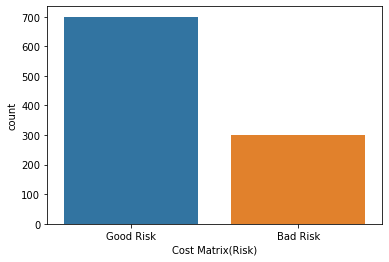

In [5]:
import seaborn as sns
sns.countplot(x="Cost Matrix(Risk)", data=df_vis)

### Data is Imbalanced

## Install imblearn if not available

In [5]:
!pip install imblearn

## Balance the data with SMOTE approch

In [6]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

In [7]:
columns = df_vis.columns
columns_data = {}

# Convert data into numberic format
new_data = copy.deepcopy(df_vis)
for column in columns:
    if new_data[column].dtype != int:
        columns_data[column] = new_data[column].unique()
        for i in range(len(columns_data[column])):
            new_data.loc[:,column][new_data[column]==columns_data[column][i]] = int(i)
        new_data[column] = pd.to_numeric(new_data[column])
    
new_data.head()

<ipython-input-7-605071dfa309>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data.loc[:,column][new_data[column]==columns_data[column][i]] = int(i)


Status of existing checking account  Duration in month  Credit history  \
0                                    0                  6               0   
1                                    1                 48               1   
2                                    2                 12               0   
3                                    0                 42               1   
4                                    0                 24               2   

   Purpose  Credit amount  Savings account/bonds  Present employment since  \
0        0           1169                      0                         0   
1        0           5951                      1                         1   
2        1           2096                      1                         2   
3        2           7882                      1                         2   
4        3           4870                      1                         1   

   Installment rate in percentage of disposable income  \
0                                                  4     
1                                                  2     
2                                                  2     
3                                                  2     
4                                                  3     

   Personal status and sex  Other debtors / guarantors  ...  Property  \
0                        0                           0  ...         0   
1                        1                           0  ...         0   
2                        0                           0  ...         0   
3                        0                           1  ...         1   
4                        0                           0  ...         2   

   Age in years  Other installment plans  Housing  \
0            67                        0        0   
1            22                        0        0   
2            49                        0        0   
3            45                        0        1   
4            53                        0        1   

   Number of existing credits at this bank  Job  \
0                                        2    0   
1                                        1    0   
2                                        1    1   
3                                        1    0   
4                                        2    0   

   Number of people being liable to provide maintenance for  Telephone  \
0                                                  1                 0   
1                                                  1                 1   
2                                                  2                 1   
3                                                  2                 1   
4                                                  2                 1   

   foreign worker  Cost Matrix(Risk)  
0               0                  0  
1               0                  1  
2               0                  0  
3               0                  0  
4               0                  1  

[5 rows x 21 columns]

In [8]:
X,y = new_data.drop("Cost Matrix(Risk)", axis="columns"),new_data["Cost Matrix(Risk)"]

### Check Risk Data Count and Balance the Data

In [9]:
y.value_counts()

0    700
1    300
Name: Cost Matrix(Risk), dtype: int64

In [10]:
X_sm,y_sm = smote.fit_resample(X,y)

In [11]:
y_sm.value_counts()

0    700
1    700
Name: Cost Matrix(Risk), dtype: int64

## Devide the test set is equal set for risk

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [14]:
y_train.value_counts()

0    560
1    560
Name: Cost Matrix(Risk), dtype: int64

In [15]:
y_test.value_counts()

0    140
1    140
Name: Cost Matrix(Risk), dtype: int64

## Train the model

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score, roc_curve, auc

print("Random Forest Classifier")

clf  = RandomForestClassifier()

# Fit the model
clf.fit(X_train, y_train)

# Predict the test cases
y_pred = clf.predict(X_test)

# Metrics
precision = precision_score(y_test,y_pred, average='micro')
recall = recall_score(y_test,y_pred, average='micro')
accuracy = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}", end="\n\n")

Random Forest
Accuracy: 0.7964285714285714
Recall: 0.7964285714285714
Precision: 0.7964285714285714
F1-score: 0.796218031384466



### Analyse the model

In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[116,  24],
       [ 33, 107]])

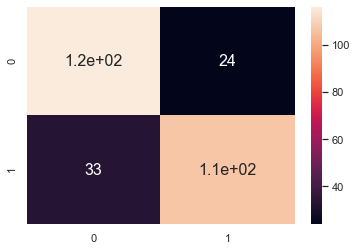

In [43]:
#Convert the values into dataframe for dispalying
df_cm = pd.DataFrame(cm, range(cm.shape[0]), range(cm.shape[1]))
sns.set(font_scale=1) # for label size
#Display the confusion matrix in the form of heatmap
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
#Show the plot
plt.show()

In [44]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

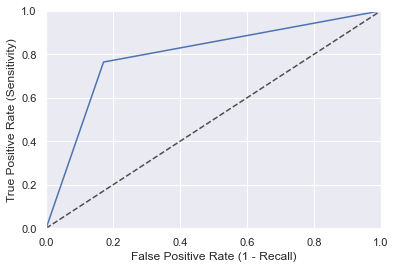



Area Under Curve: 0.80




In [45]:
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.xlabel('False Positive Rate (1 - Recall)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()
print("\n")
print ("Area Under Curve: %.2f" %auc(fpr, tpr))
print("\n")

#### Save the Model

In [46]:
from joblib import dump, load

dump(clf, './models/credit_risk.model') 

['./models/credit_risk.model']

## Analyse Data Prediction

### Instal lime if not available

In [52]:
!pip install lime

     |████████████████████████████████| 275 kB 1.9 MB/s eta 0:00:01
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283845 sha256=63939a3edfba94f19927bca44edeab869cfeb5f8ab3c4b402811064f5d707316
  Stored in directory: /Users/purnendukar/Library/Caches/pip/wheels/e6/a6/20/cc1e293fcdb67ede666fed293cb895395e7ecceb4467779546
Successfully built lime


In [55]:
from lime import lime_tabular
import numpy as np
explainer = lime_tabular.LimeTabularExplainer(
    training_data = np.array(X_train),
    mode = "regression",
    feature_names = X_train.columns,
    categorical_features = [0]
)

In [59]:
exp = explainer.explain_instance(
    data_row = X_test.iloc[4],
    predict_fn = clf.predict
)
exp.show_in_notebook(show_table=True)

In [60]:
exp.as_list()

[('Status of existing checking account=0', 0.4583701310461536),
 ('Duration in month <= 12.00', -0.2773486991028353),
 ('foreign worker > 0.00', -0.1630047431105305),
 ('1.00 < Number of existing credits at this bank <= 2.00',
  -0.10143488592550992),
 ('Other debtors / guarantors > 0.00', -0.08998477529409488),
 ('Credit history <= 0.00', -0.0721883065337643),
 ('Number of people being liable to provide maintenance for <= 1.00',
  0.07147572814688875),
 ('1399.75 < Credit amount <= 2473.50', -0.07047930397756806),
 ('0.00 < Telephone <= 1.00', -0.040926423198473554),
 ('26.00 < Age in years <= 32.00', 0.03797156513614331)]

## Analyse the Data Relations

### Install h2o package if not avaiable 

In [49]:
!pip install h2o

     |████████████████████████████████| 164.8 MB 99 kB/s  eta 0:00:01    |█████████████████▏              | 88.3 MB 5.3 MB/s eta 0:00:15     |████████████████████▋           | 105.9 MB 3.8 MB/s eta 0:00:16
  Created wheel for h2o: filename=h2o-3.32.1.4-py2.py3-none-any.whl size=164871668 sha256=3c7fd615306f91fd61d1028ad0eb32cfa3e5dcdf839ab84ca251be7ef32e6569
  Stored in directory: /Users/purnendukar/Library/Caches/pip/wheels/7e/18/26/bee4909adb7fc0dbf434a225857665ac9bd80ba61a0743c14a
Successfully built h2o


Checking whether there is an H2O instance running at http://localhost:54321 . connected.


--------------------------  ------------------------------------------------------------------
H2O_cluster_uptime:         22 mins 11 secs
H2O_cluster_timezone:       Asia/Kolkata
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.32.1.4
H2O_cluster_version_age:    9 days
H2O_cluster_name:           H2O_from_python_purnendukar_ln8pkd
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    1.656 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
H2O_API_Extensions:         Amazon S3, XGBoost, Algos, AutoML, Core V3, TargetEncoder, Core V4
Python_version:             3.8.8 final
--------------------------  ------------------------------------------------------------------

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id mean_residual_deviance rmse mse mae rmsle training_time_ms predict_time_per_row_ms algo 
 
 
 StackedEnsemble_AllModels_AutoML_20210718_002309 0.135066 0.367513 0.135066 0.277595 0.260356 149 0.03118 StackedEnsemble 
 StackedEnsemble_BestOfFamily_AutoML_20210718_002309 0.136023 0.368813 0.136023 0.284039 0.260884 128 0.016456 StackedEnsemble 
 XGBoost_grid__1_AutoML_20210718_002309_model_23 0.139761 0.373846 0.139761 0.291005 0.264933 136 0.003477 XGBoost 
 XGBoost_grid__1_AutoML_20210718_002309_model_14 0.142168 0.377051 0.142168 0.288092 0.268307 156 0.003384 XGBoost 
 XGBoost_grid__1_AutoML_20210718_002309_model_16 0.143344 0.378609 0.143344 0.296659 0.268562 268 0.005216 XGBoost 
 GBM_grid__1_AutoML_20210718_002309_model_6 0.14387 0.379303 0.14387 0.298263 0.268462 144 0.012341 GBM 
 XGBoost_grid__1_AutoML_20210718_002309_model_26 0.145073 0.380885 0.145073 0.295341 0.270692 155 0.002989 XGBoost 
 GBM_1_AutoML_20210718_002309 0.145177 0.381022 0.145177 0.294882 0.26968 85 0.009903 GBM 
 GBM_2_AutoML_20210718_002309 0.145527 0.38148 0.145527 0.295688 0.270133 142 0.010359 GBM 
 GBM_3_AutoML_20210718_002309 0.145528 0.381481 0.145528 0.296304 0.269673 100 0.010267 GBM 
 XGBoost_grid__1_AutoML_20210718_002309_model_28 0.146232 0.382404 0.146232 0.300062 0.270904 96 0.002473 XGBoost 
 XGBoost_grid__1_AutoML_20210718_002309_model_24 0.146284 0.382471 0.146284 0.302611 0.270705 118 0.002893 XGBoost 
 DRF_1_AutoML_20210718_002309 0.146346 0.382552 0.146346 0.306327 0.27184 142 0.010994 DRF 
 GBM_4_AutoML_20210718_002309 0.146383 0.3826 0.146383 0.295139 0.270625 117 0.010653 GBM 
 XGBoost_grid__1_AutoML_20210718_002309_model_27 0.147654 0.384257 0.147654 0.295075 0.273124 195 0.003488 XGBoost 
 GBM_grid__1_AutoML_20210718_002309_model_2 0.147758 0.384393 0.147758 0.297325 0.272128 82 0.01054 GBM 
 GBM_grid__1_AutoML_20210718_002309_model_5 0.149305 0.3864 0.149305 0.307735 0.272617 125 0.009846 GBM 
 XGBoost_grid__1_AutoML_20210718_002309_model_12 0.150425 0.387847 0.150425 0.288529 0.276211 167 0.003952 XGBoost 
 XGBoost_grid__1_AutoML_20210718_002309_model_19 0.150706 0.388209 0.150706 0.30077 0.277143 195 0.003475 XGBoost 
 XGBoost_grid__1_AutoML_20210718_002309_model_5 0.150728 0.388238 0.150728 0.297805 0.27576 65 0.002002 XGBoost

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

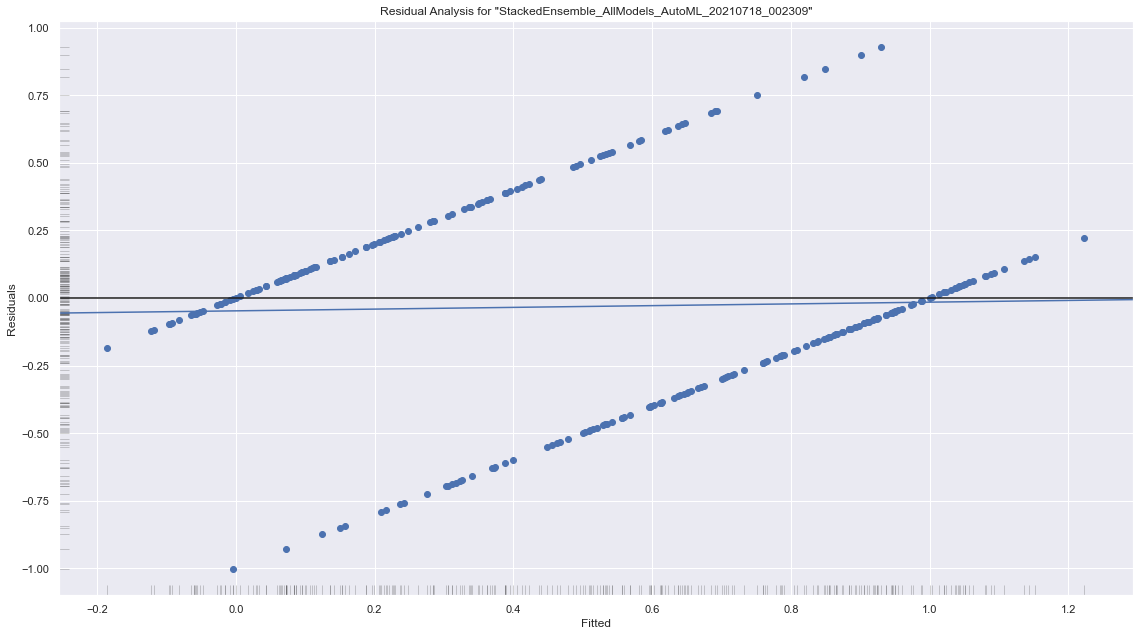

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

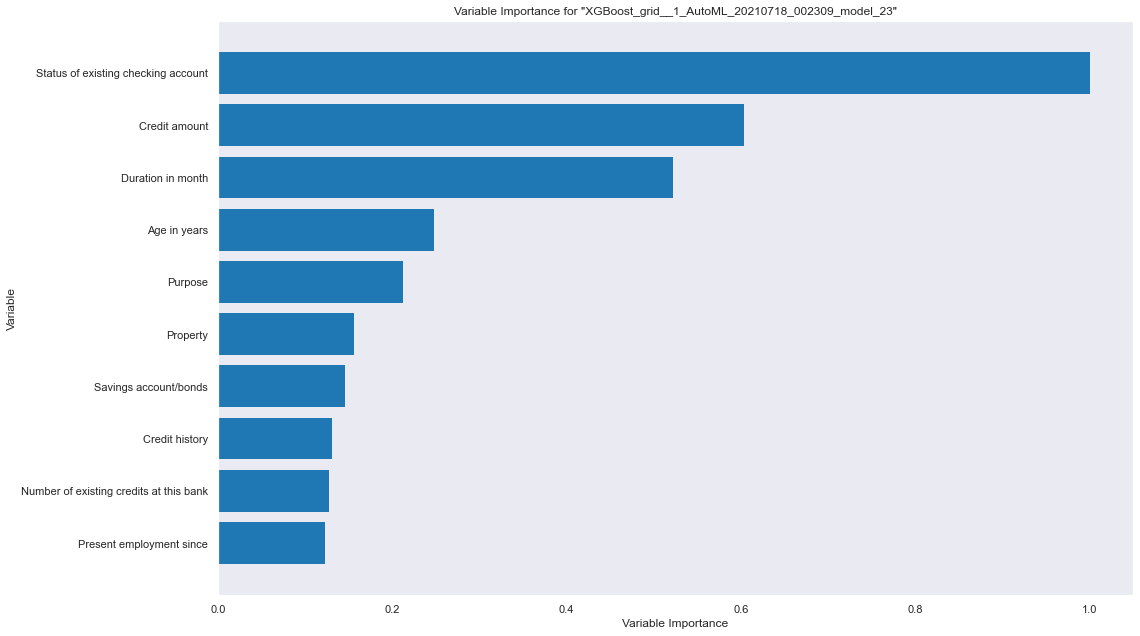

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

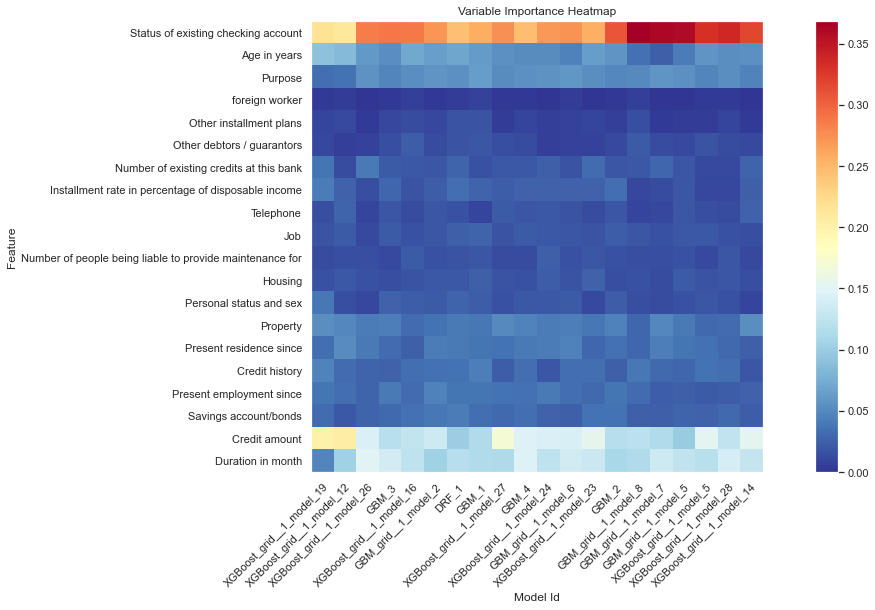

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

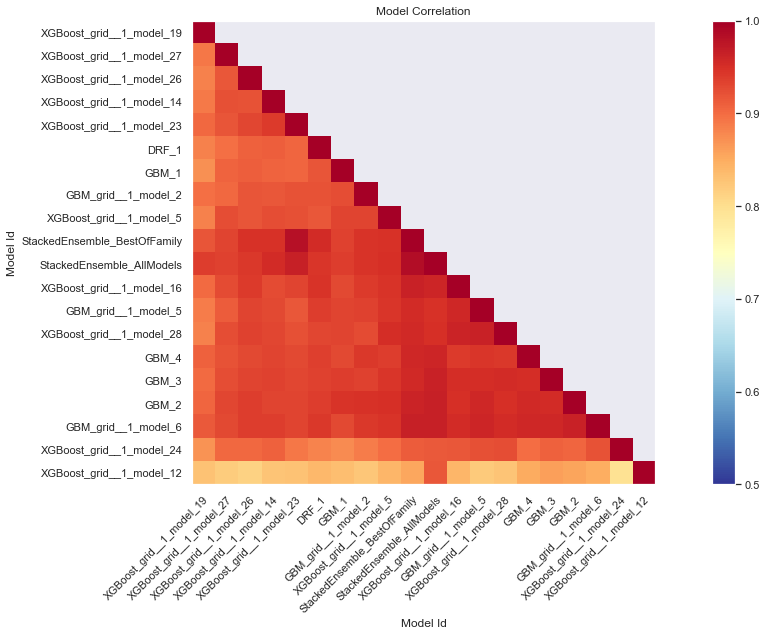

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

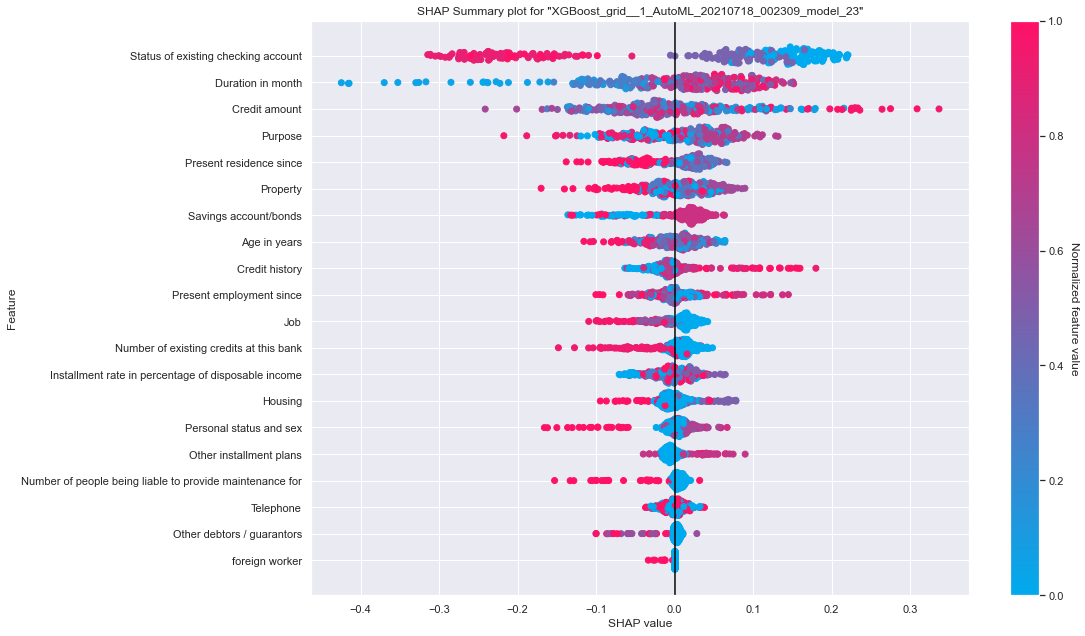

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

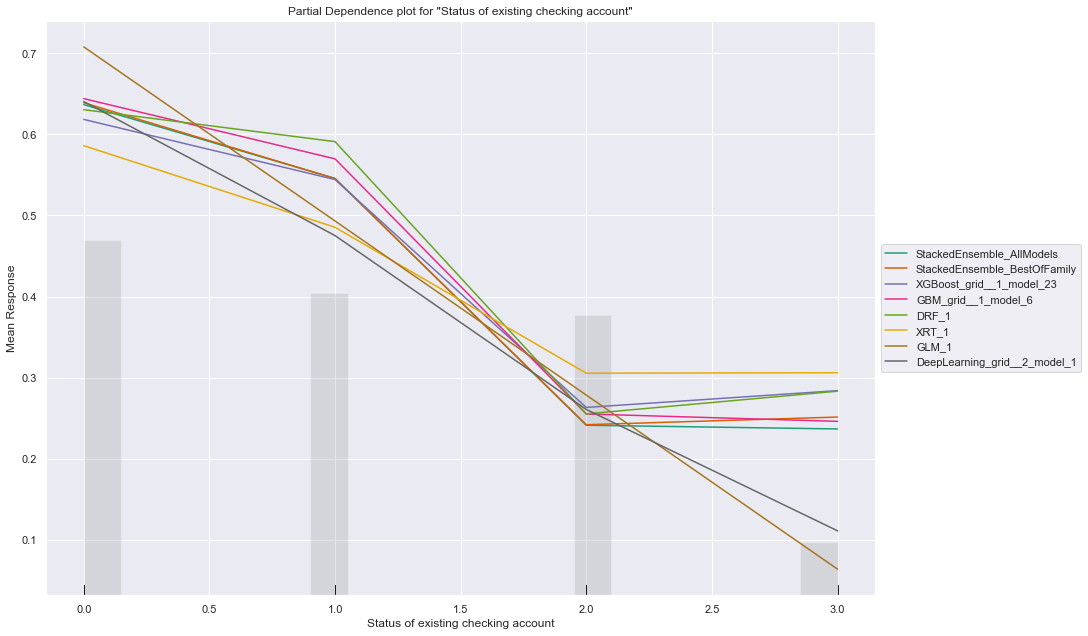

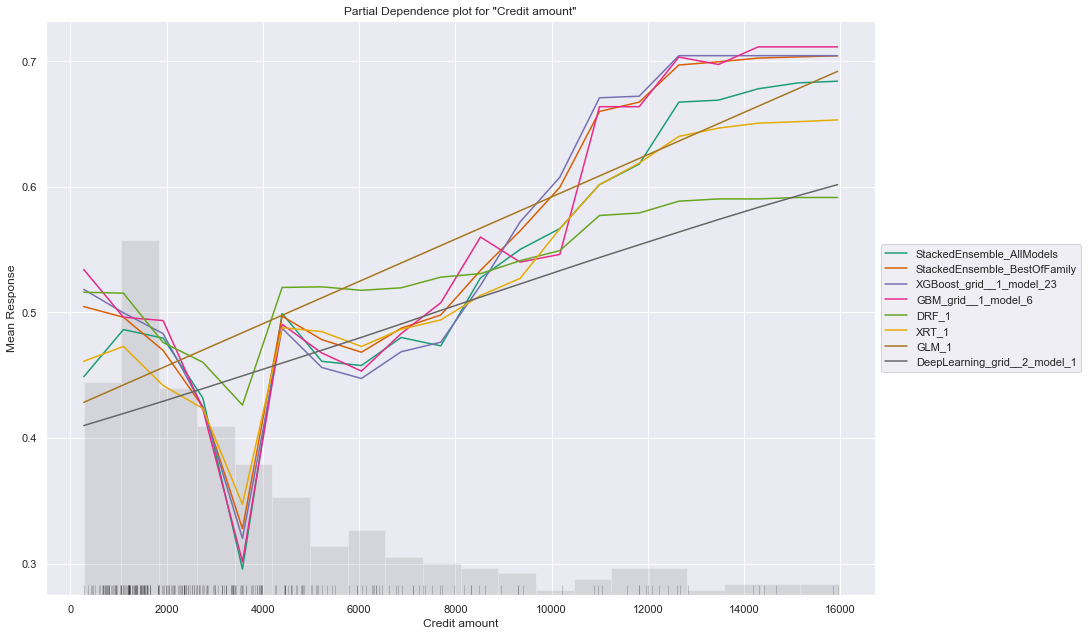

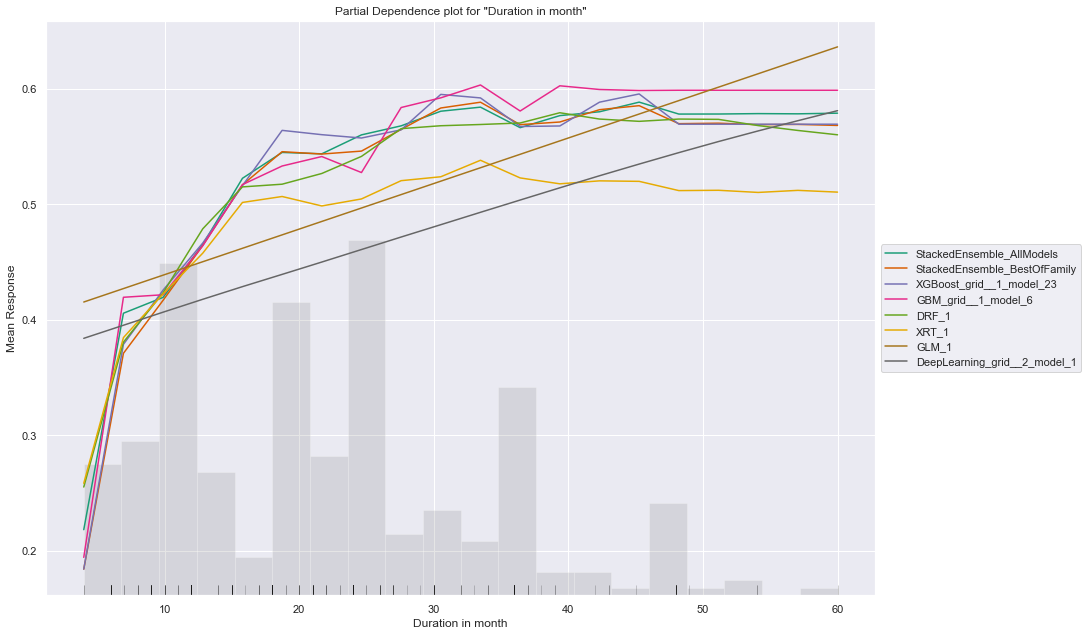

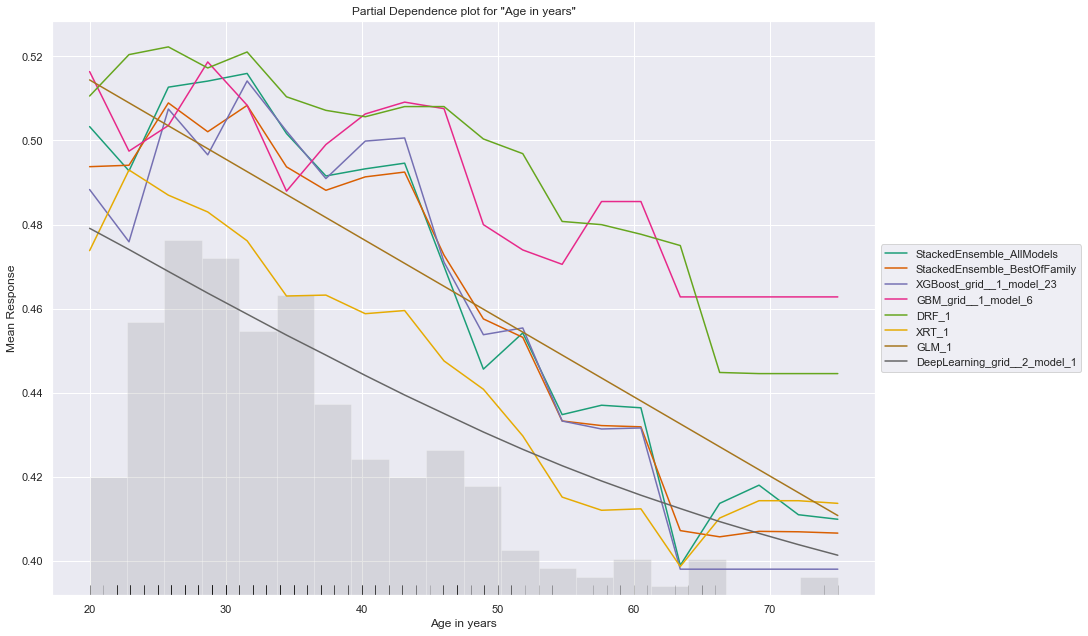

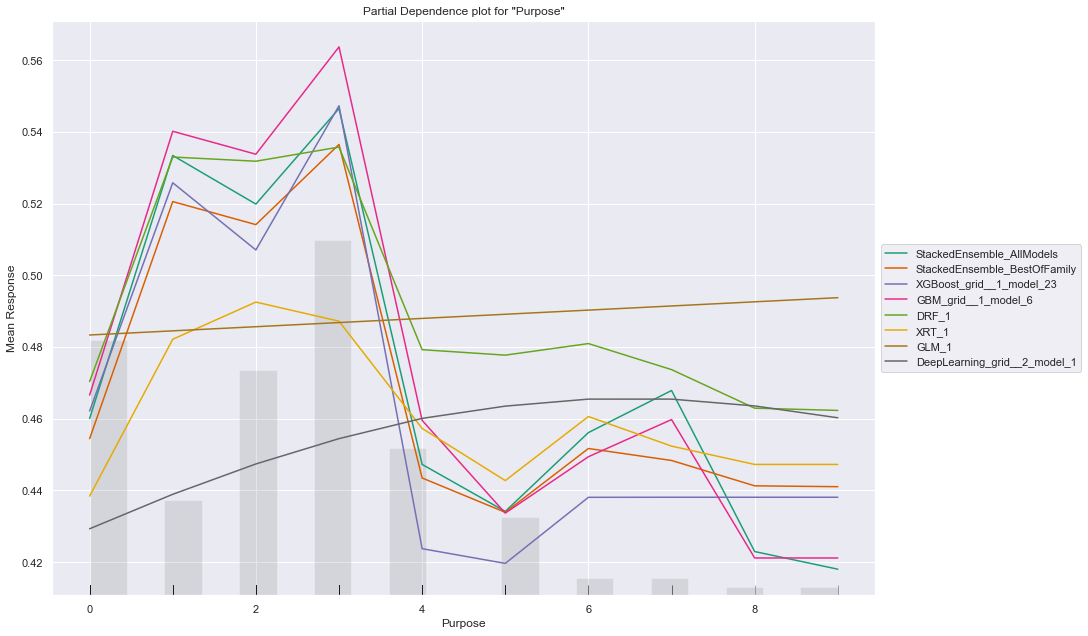

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

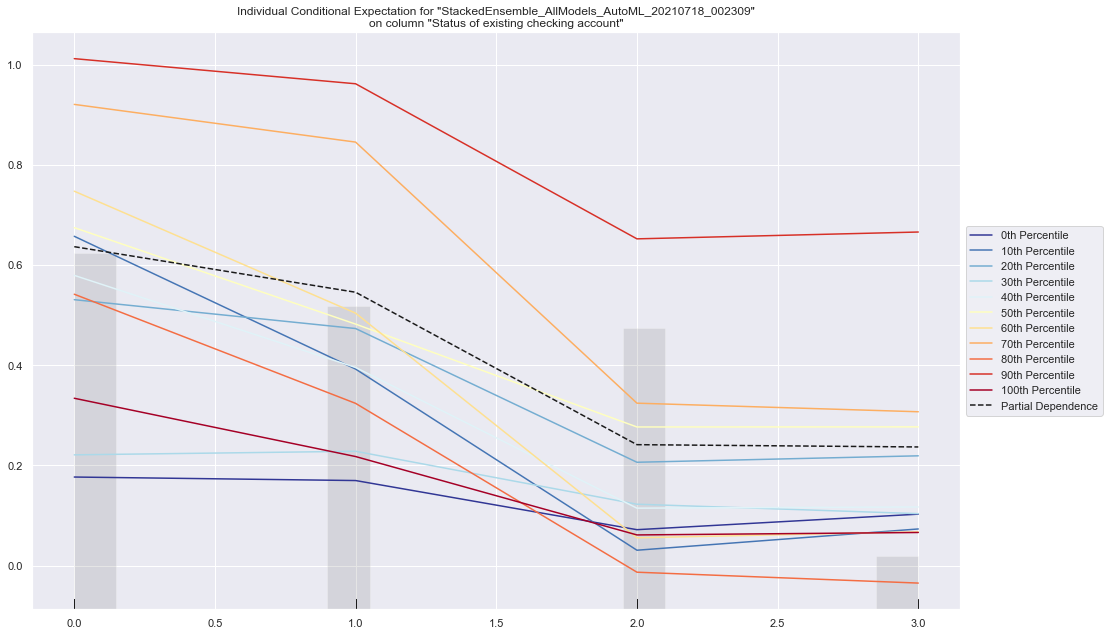

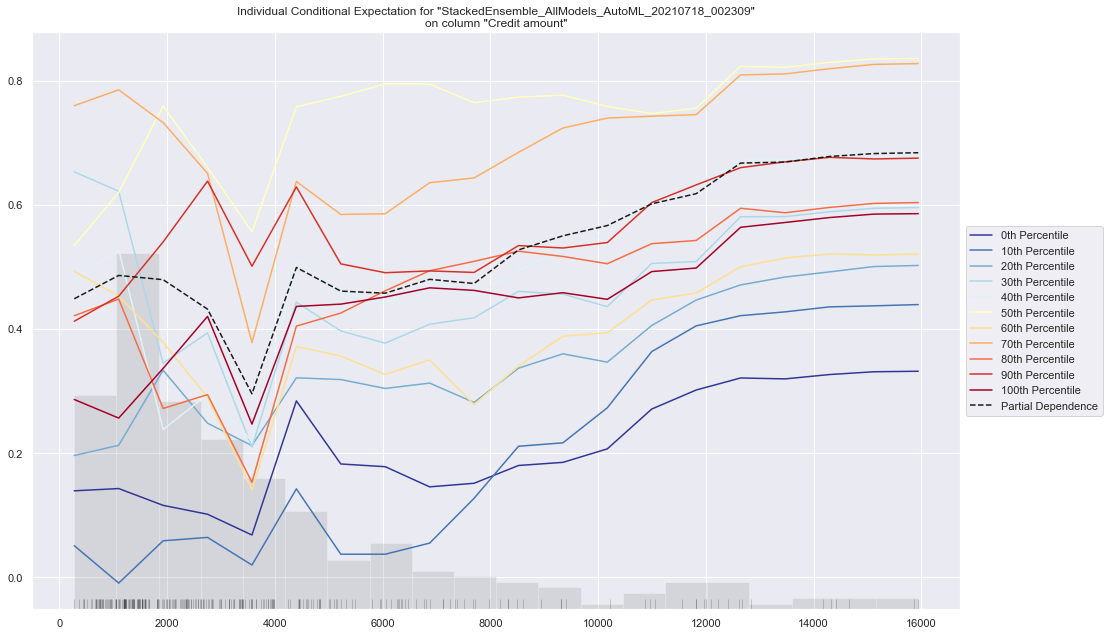

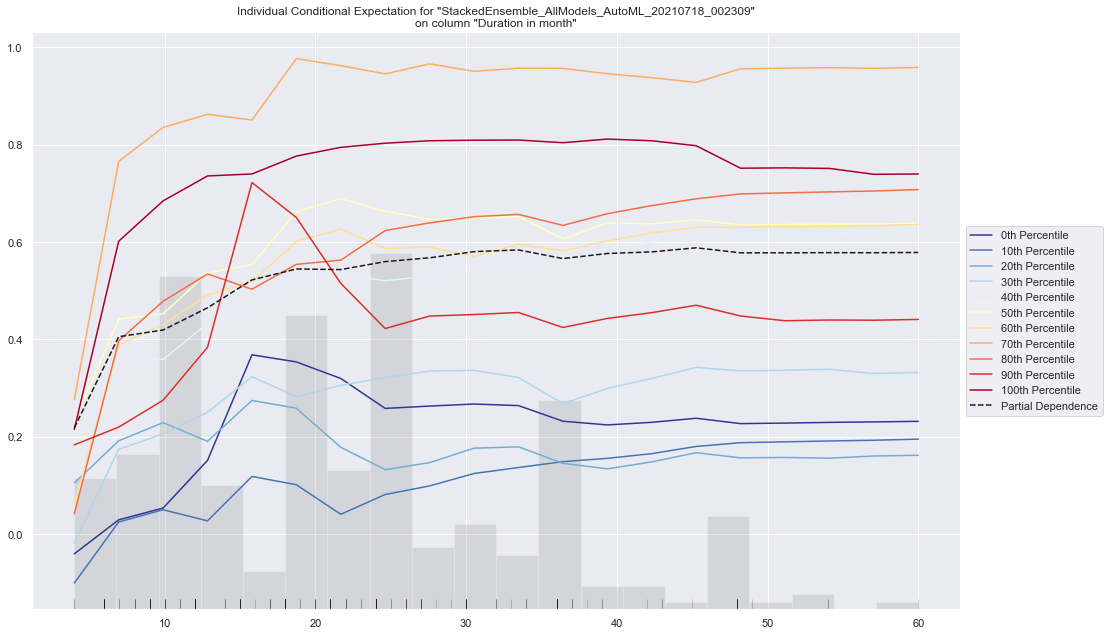

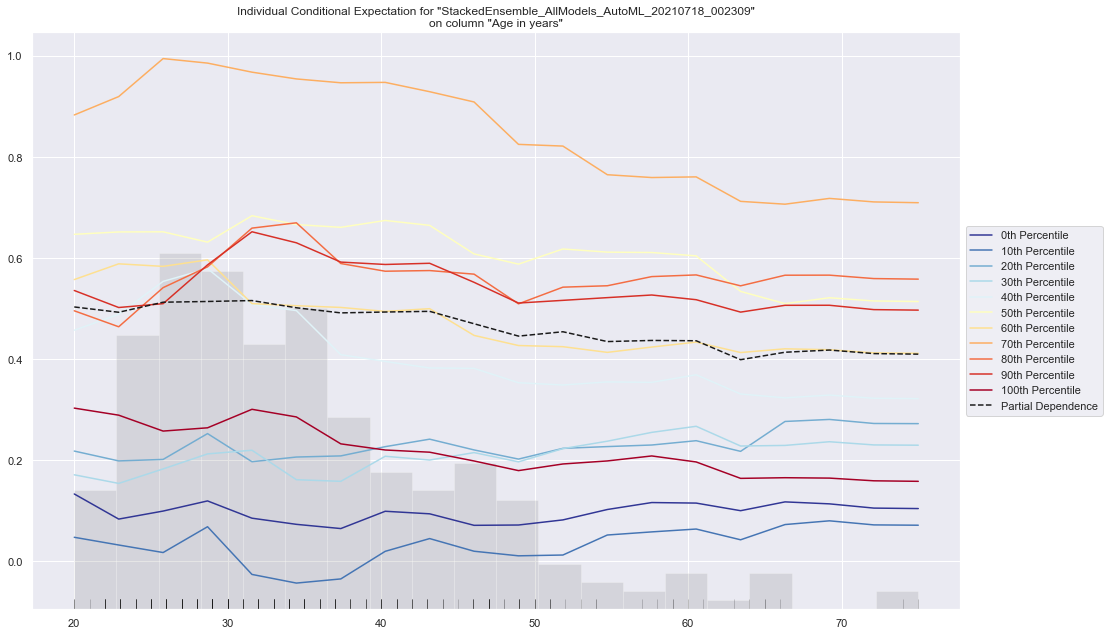

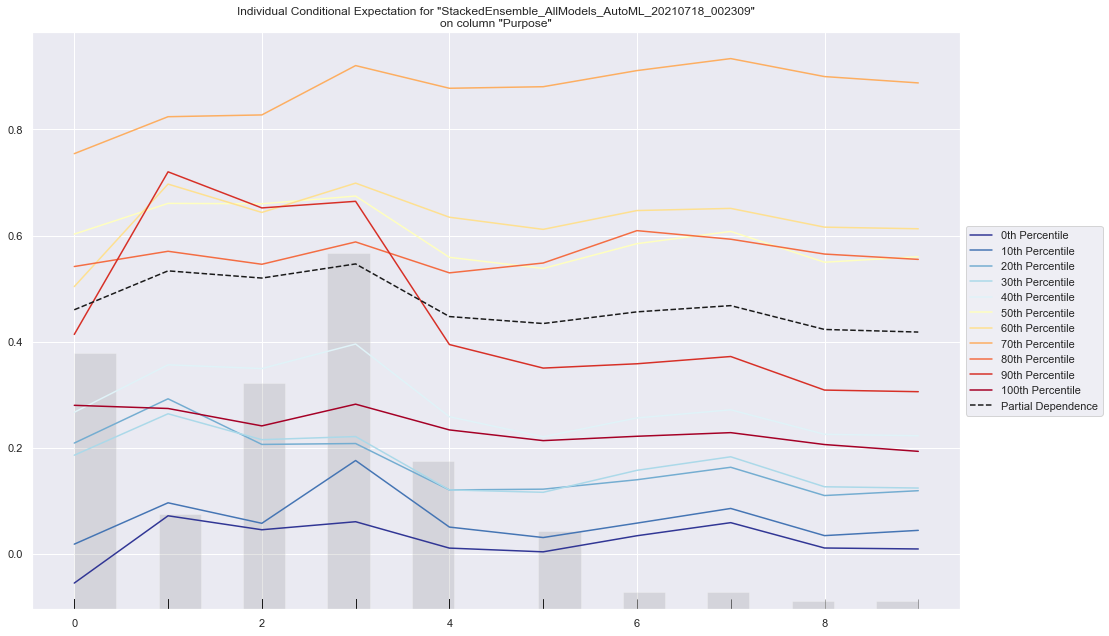

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

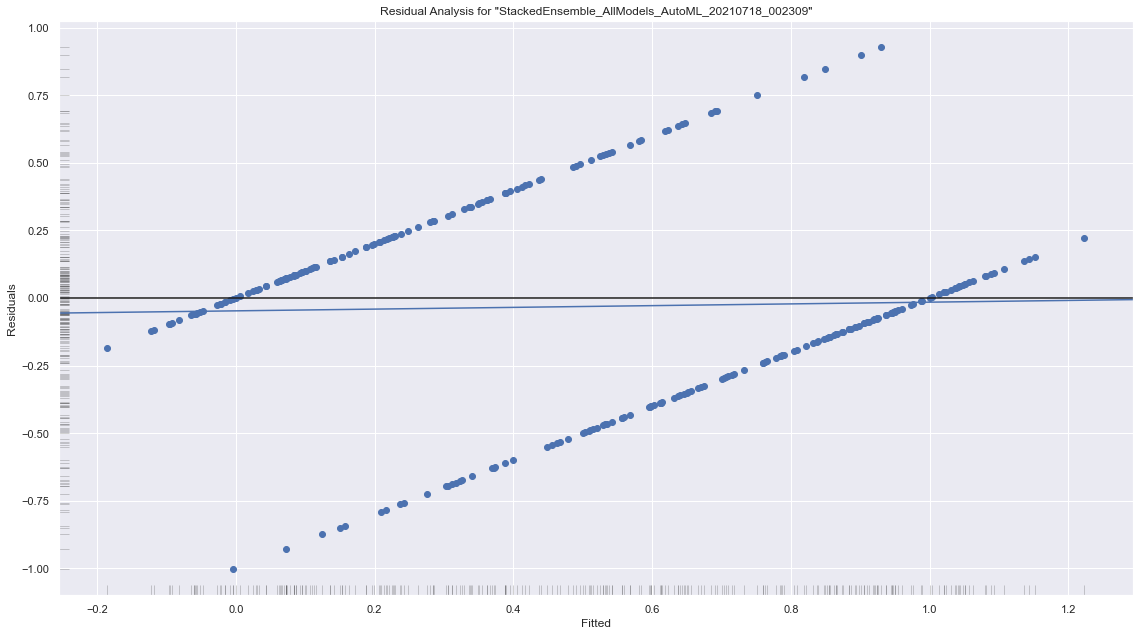

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

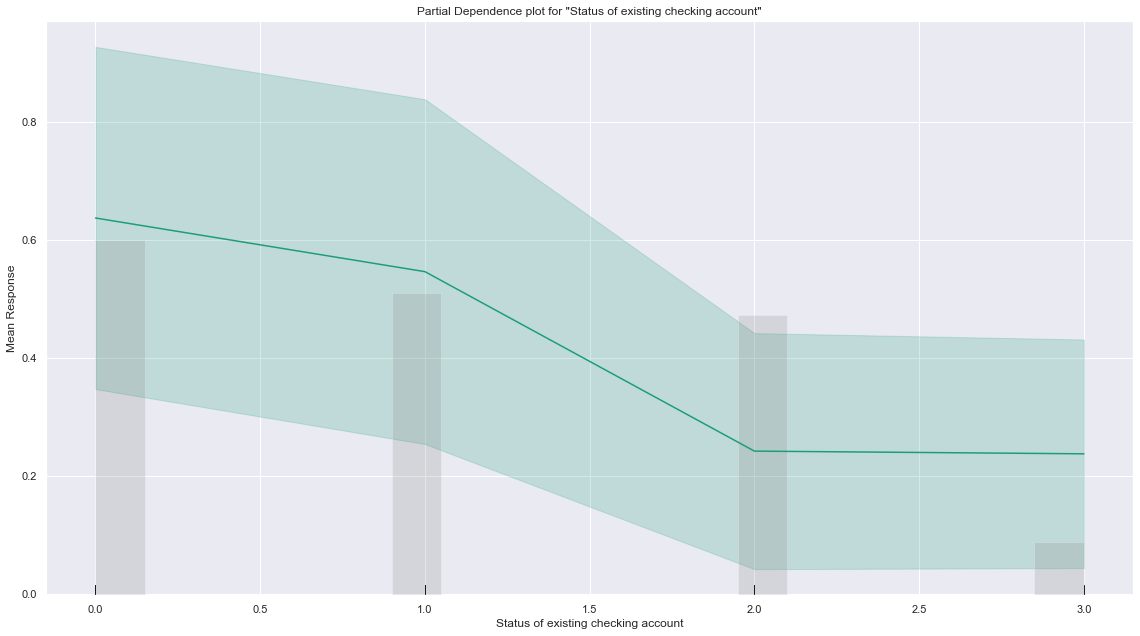

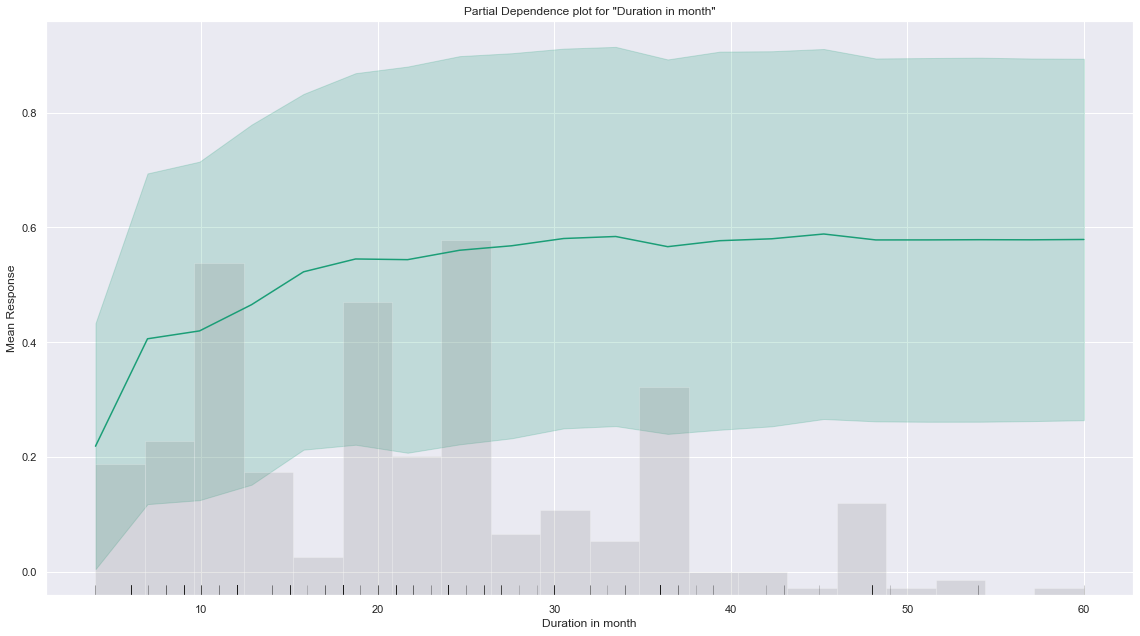

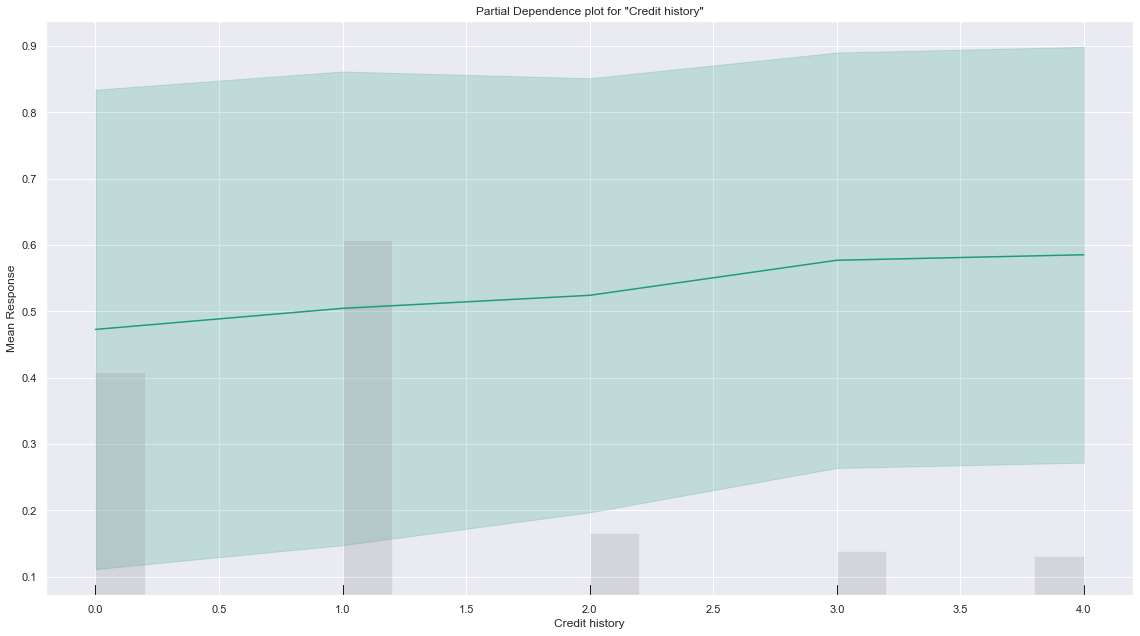

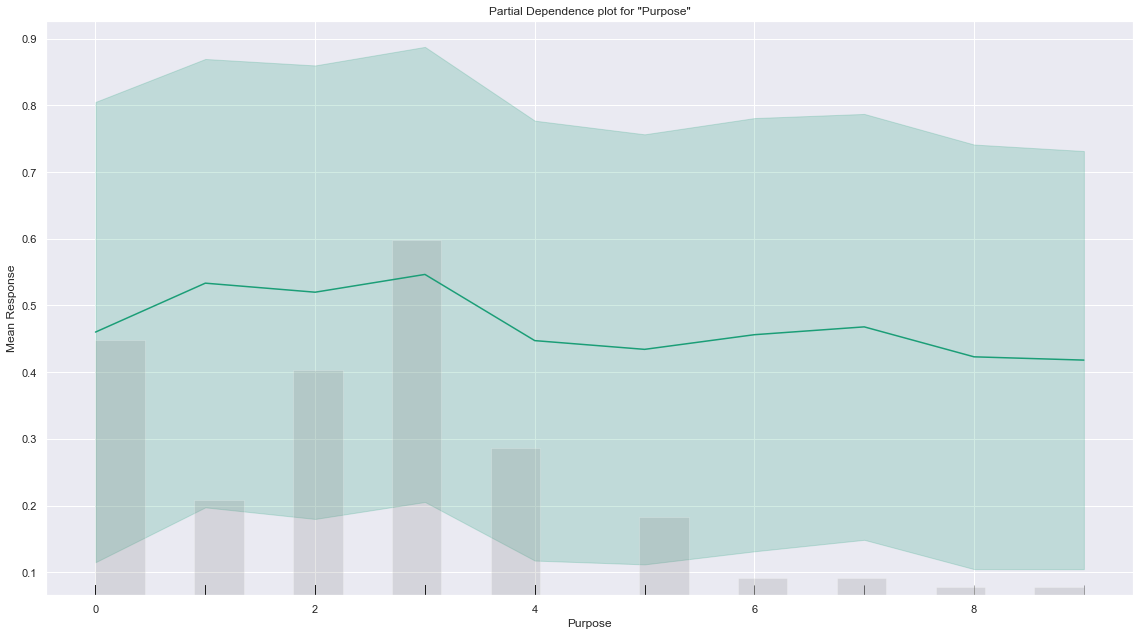

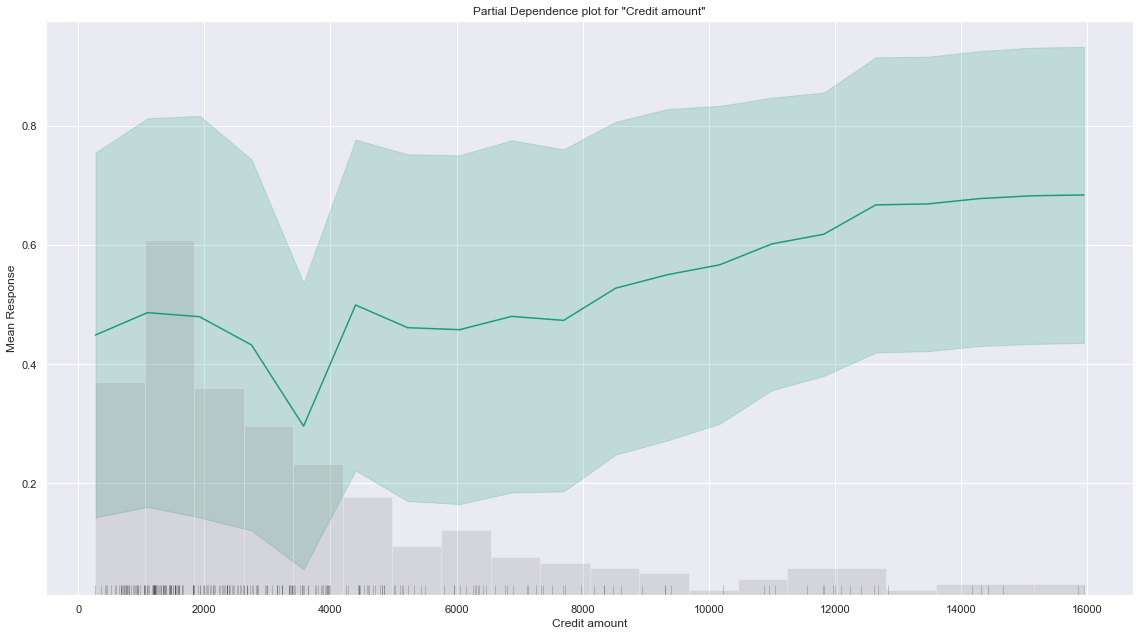

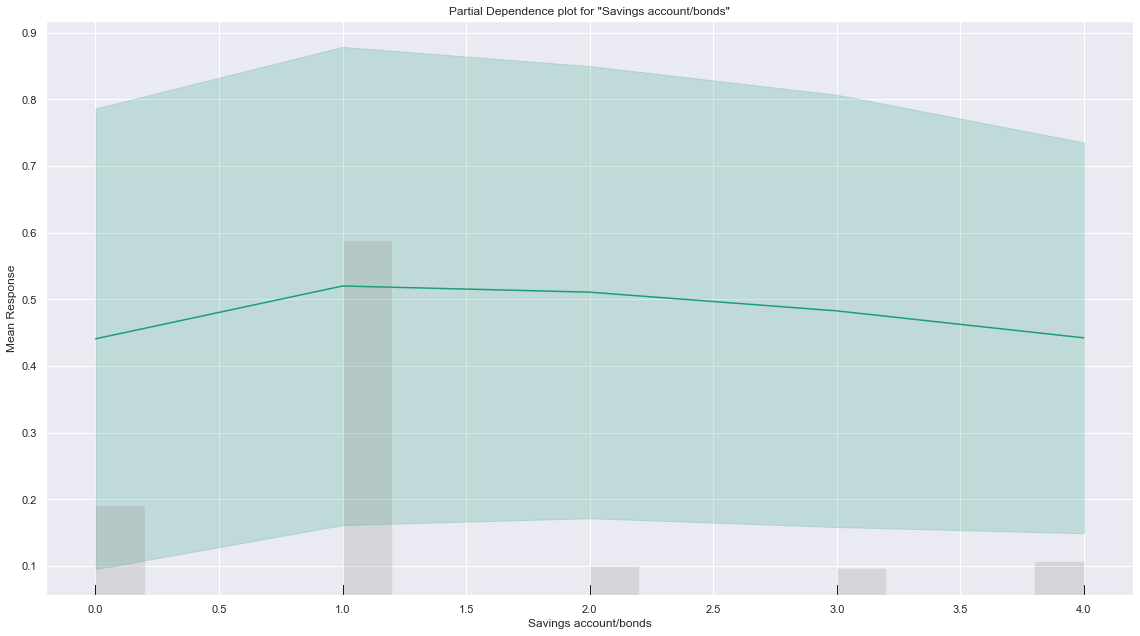

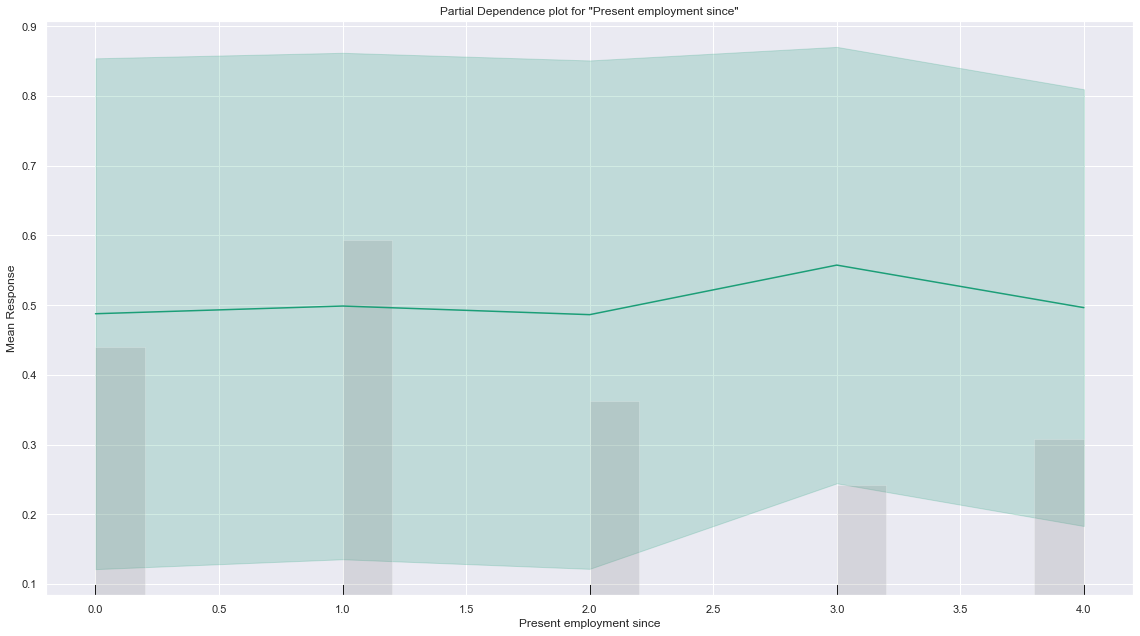

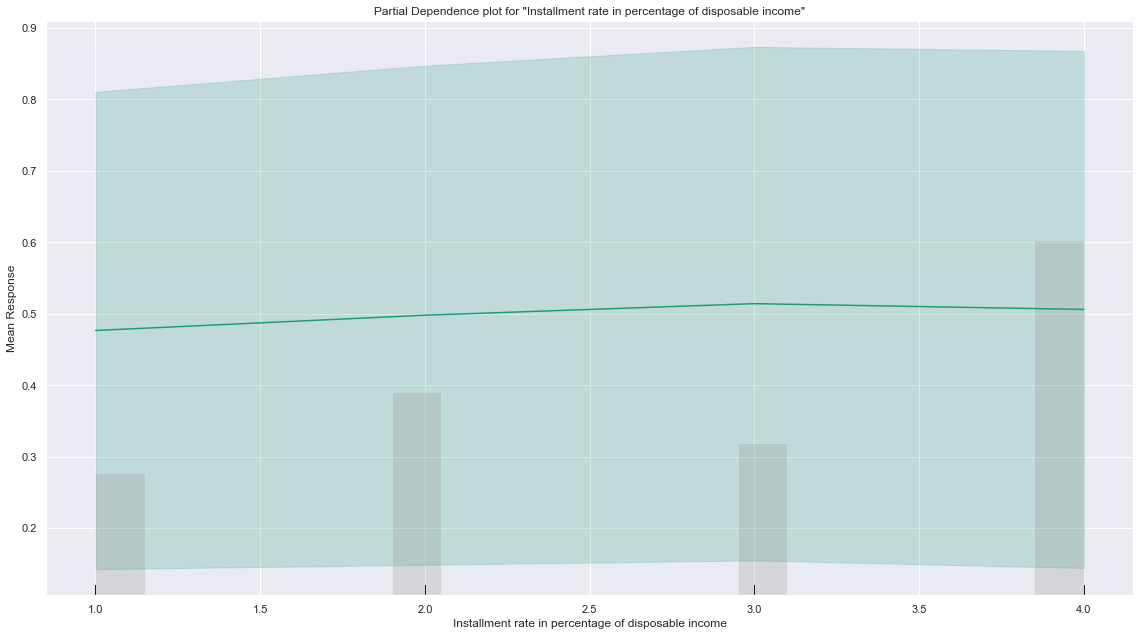

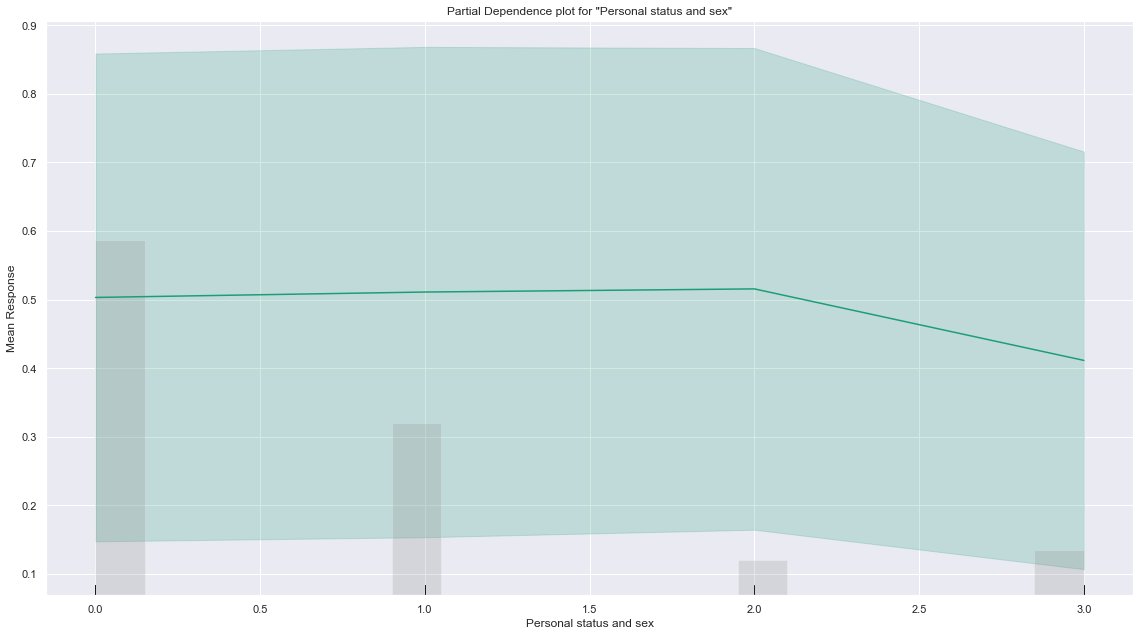

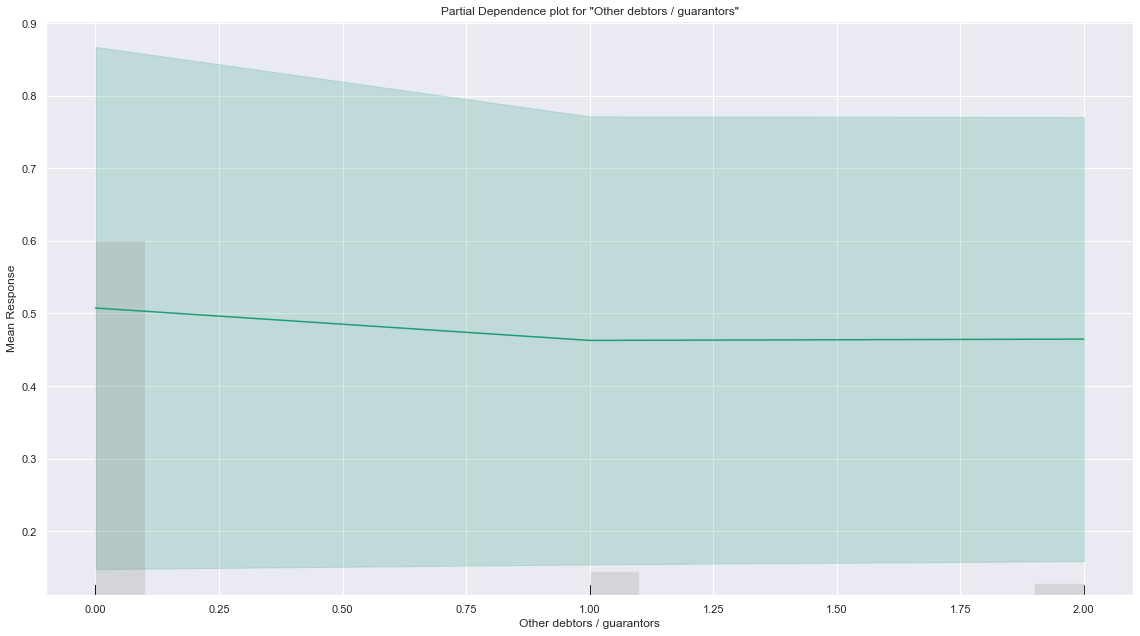

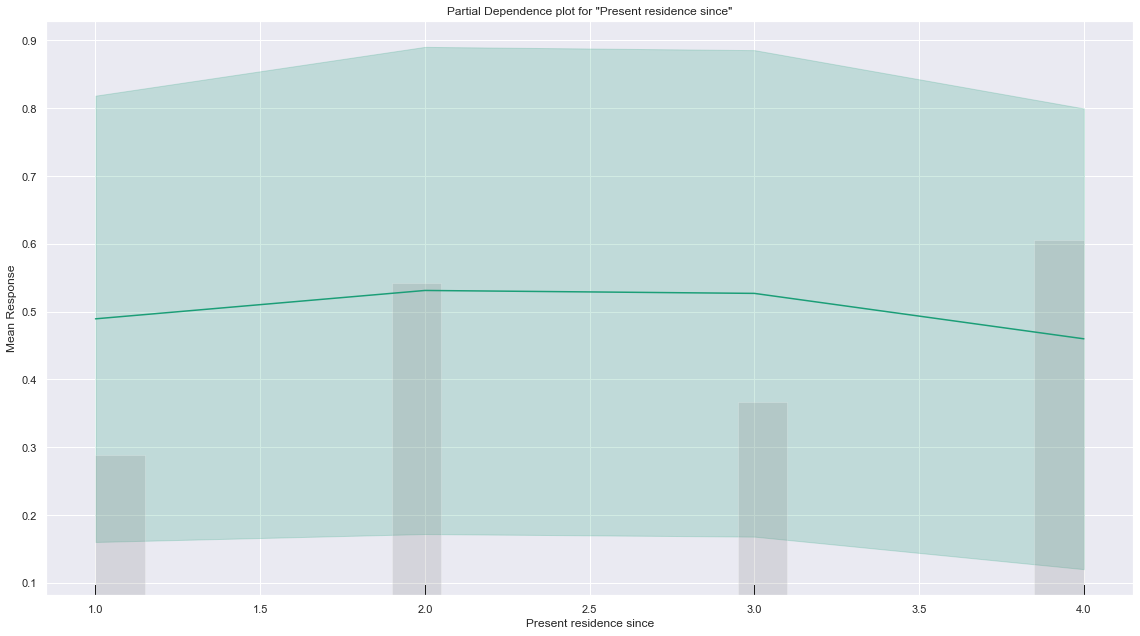

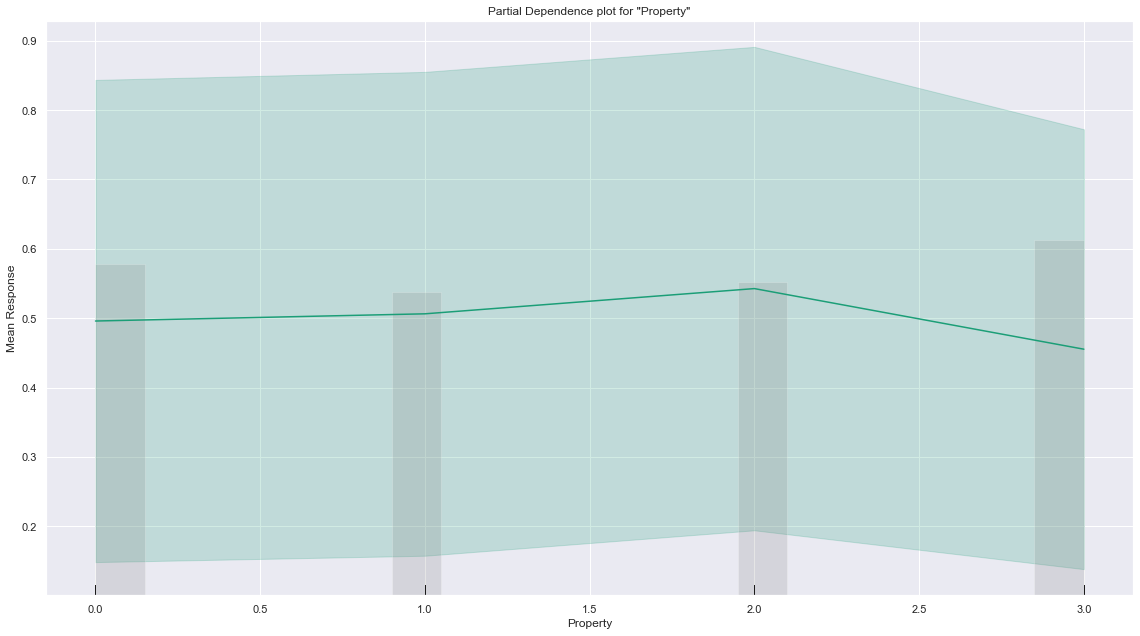

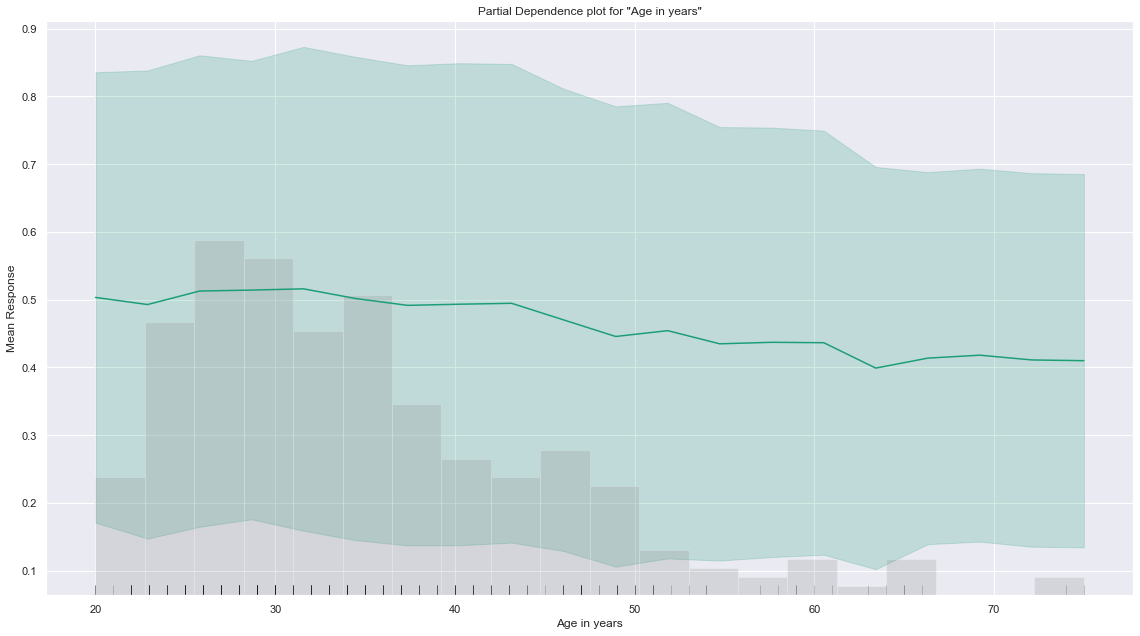

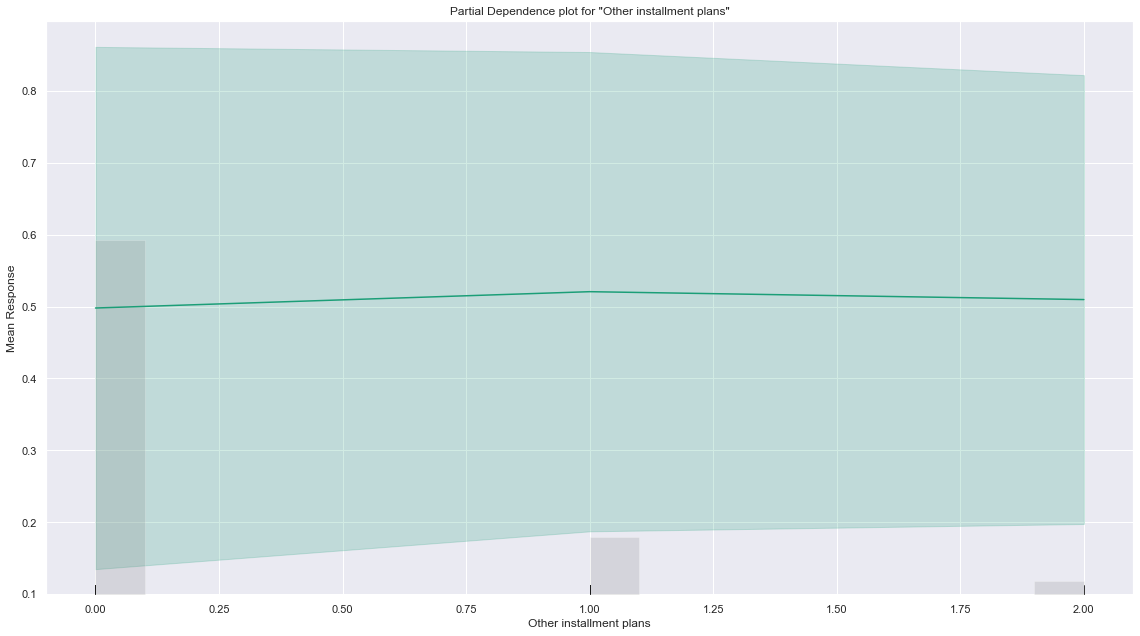

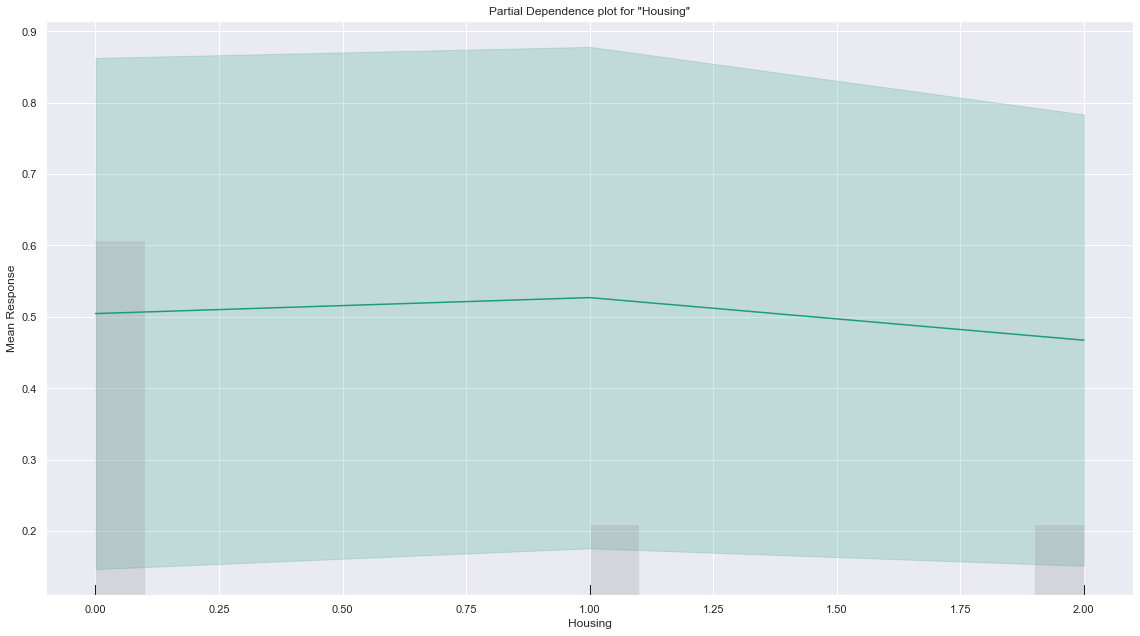

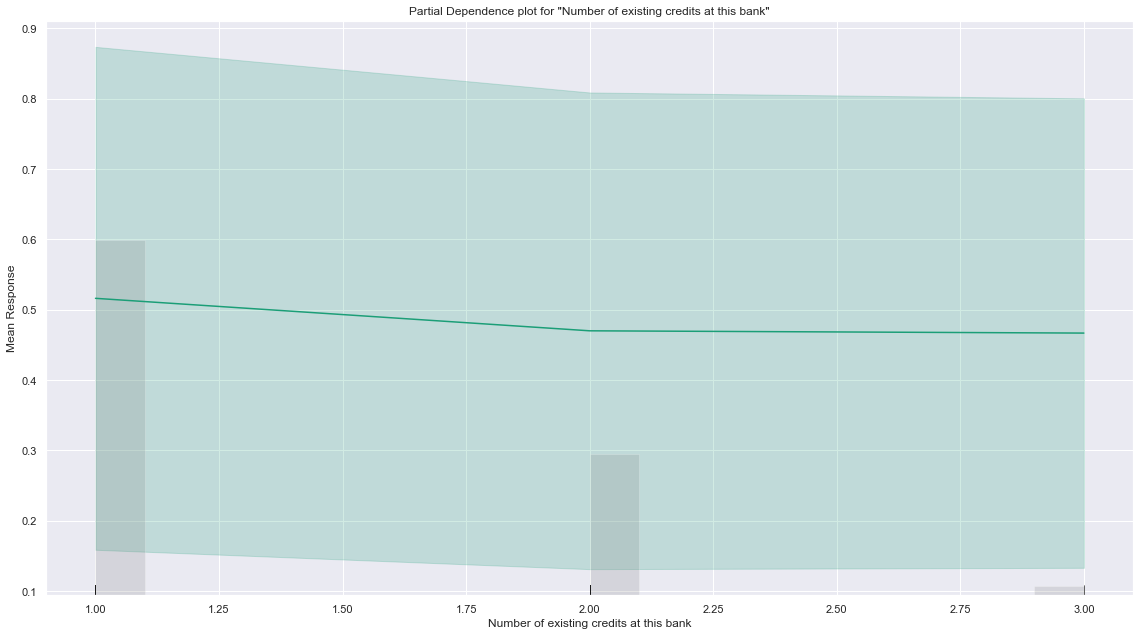

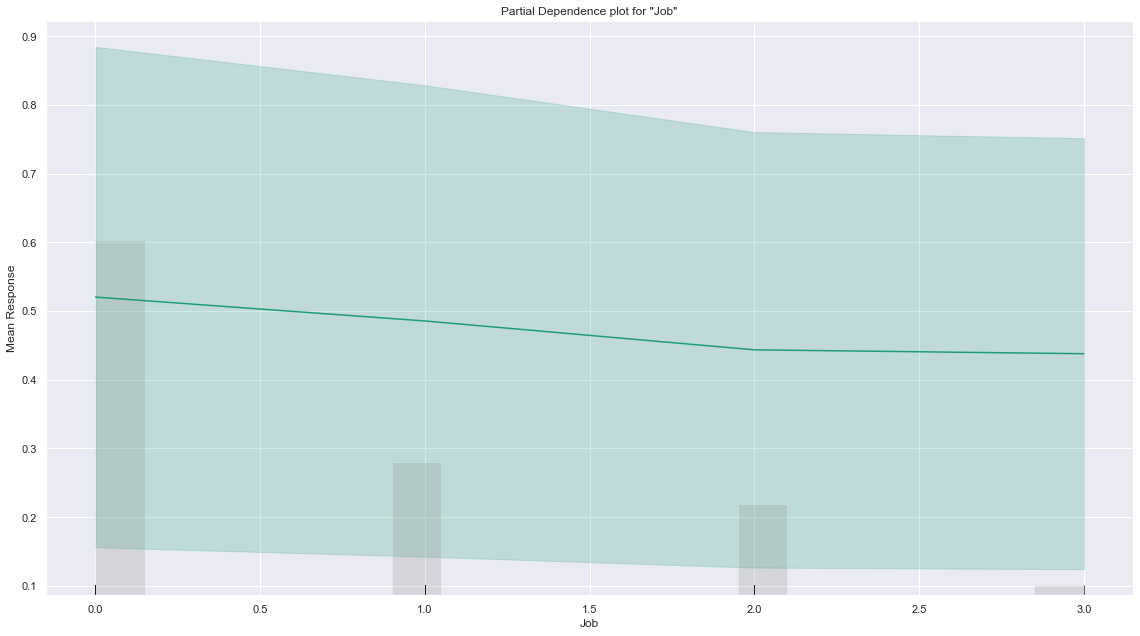

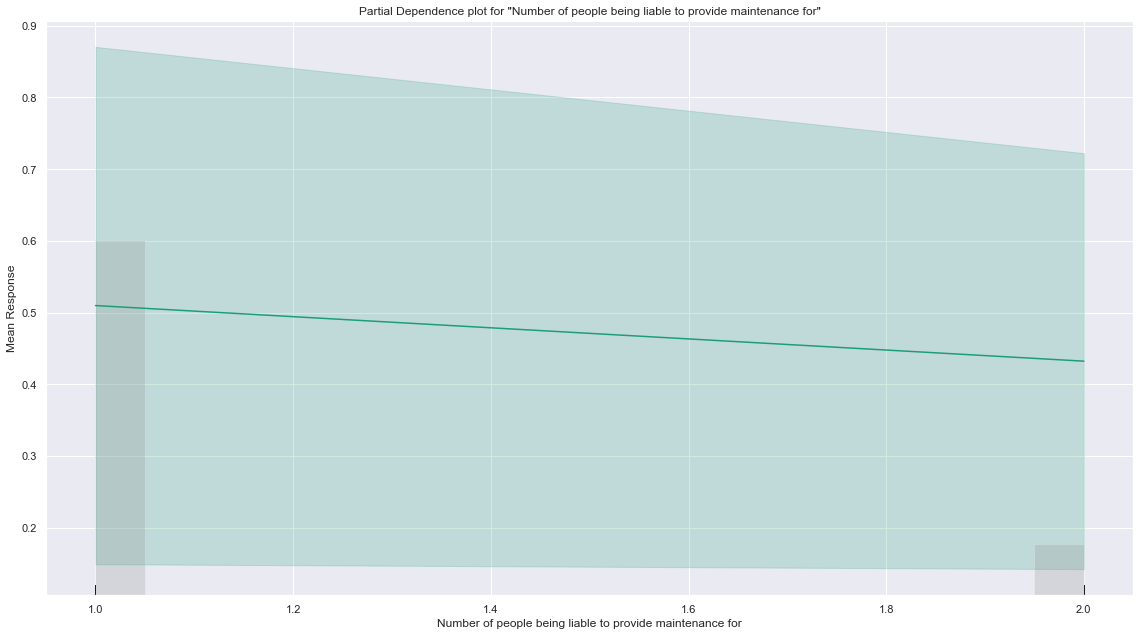

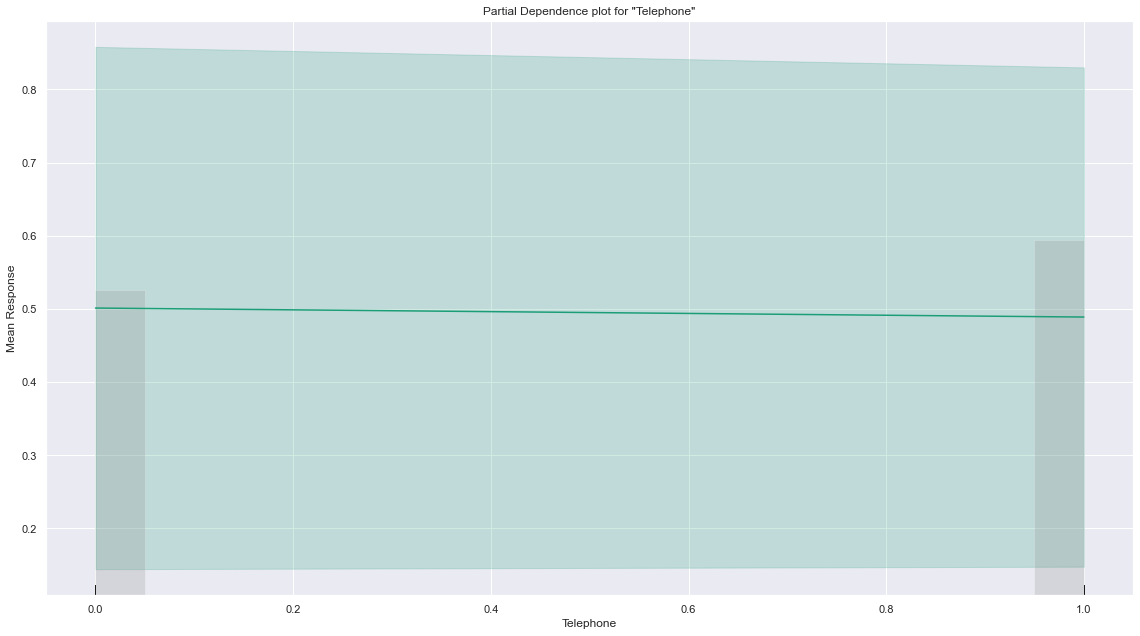

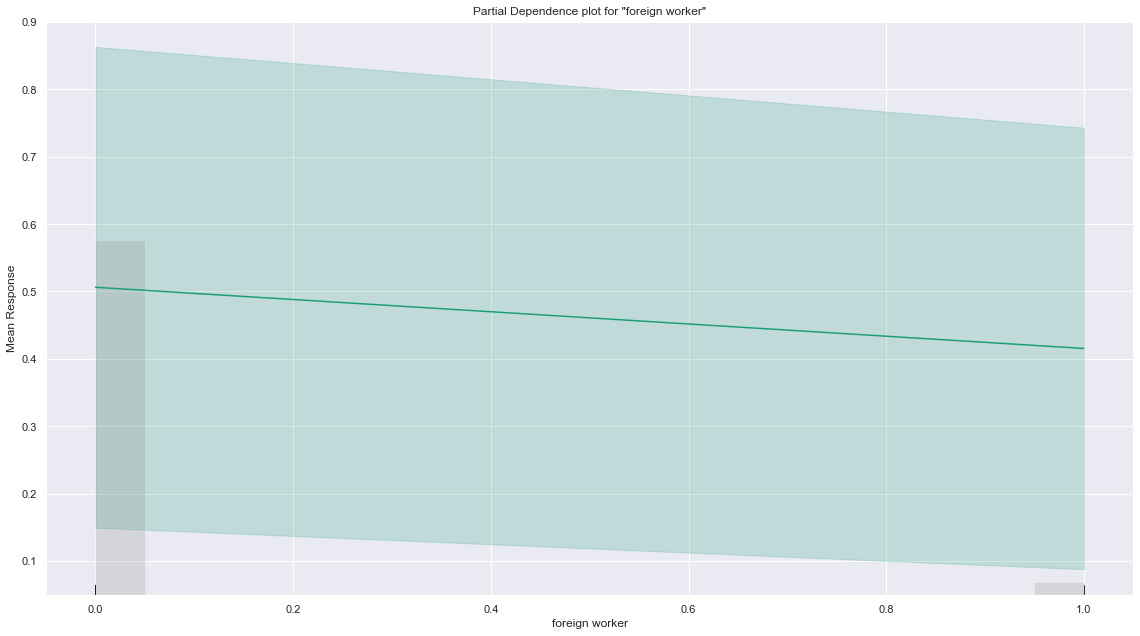

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

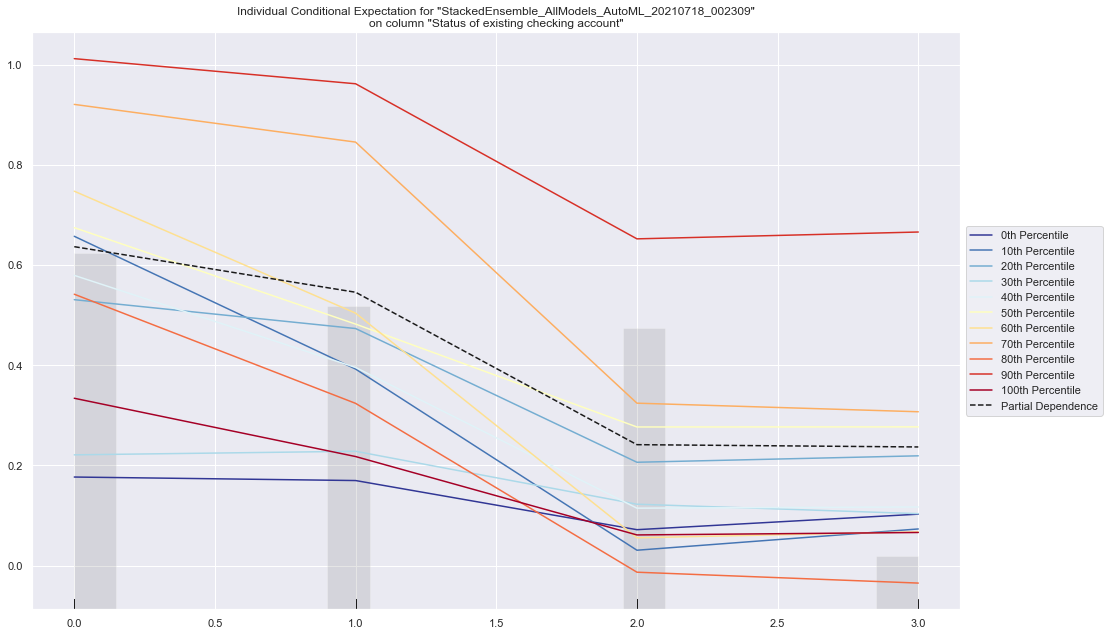

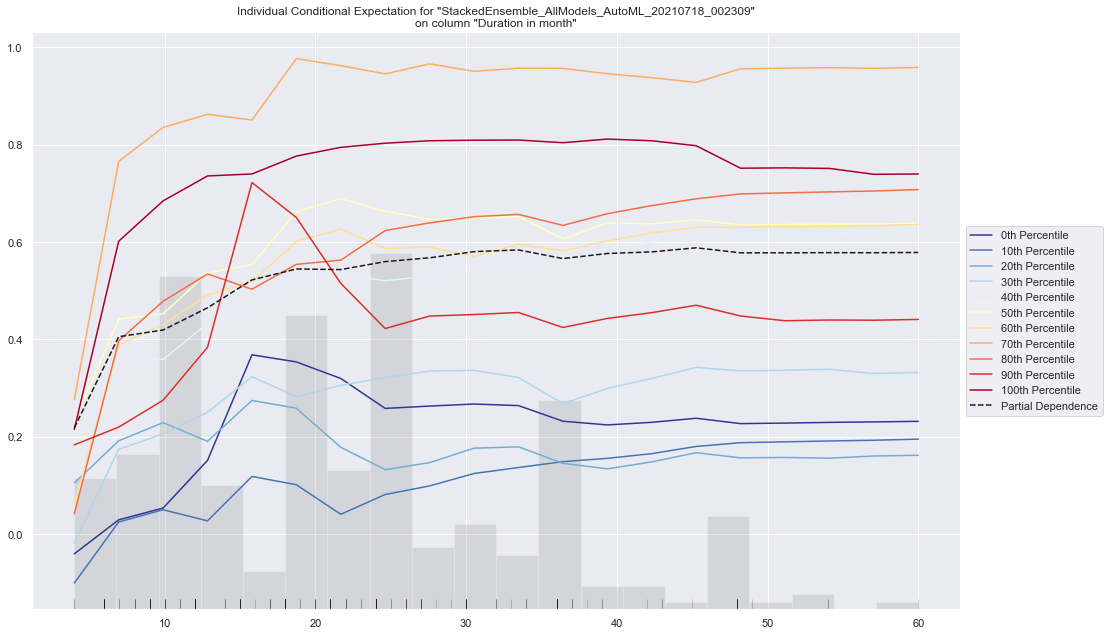

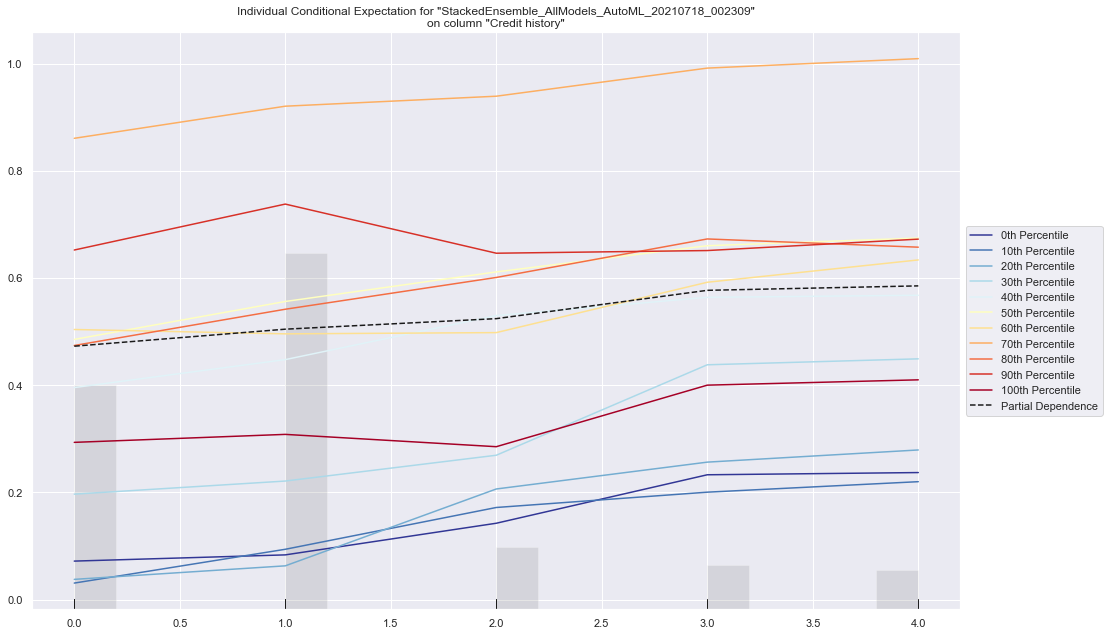

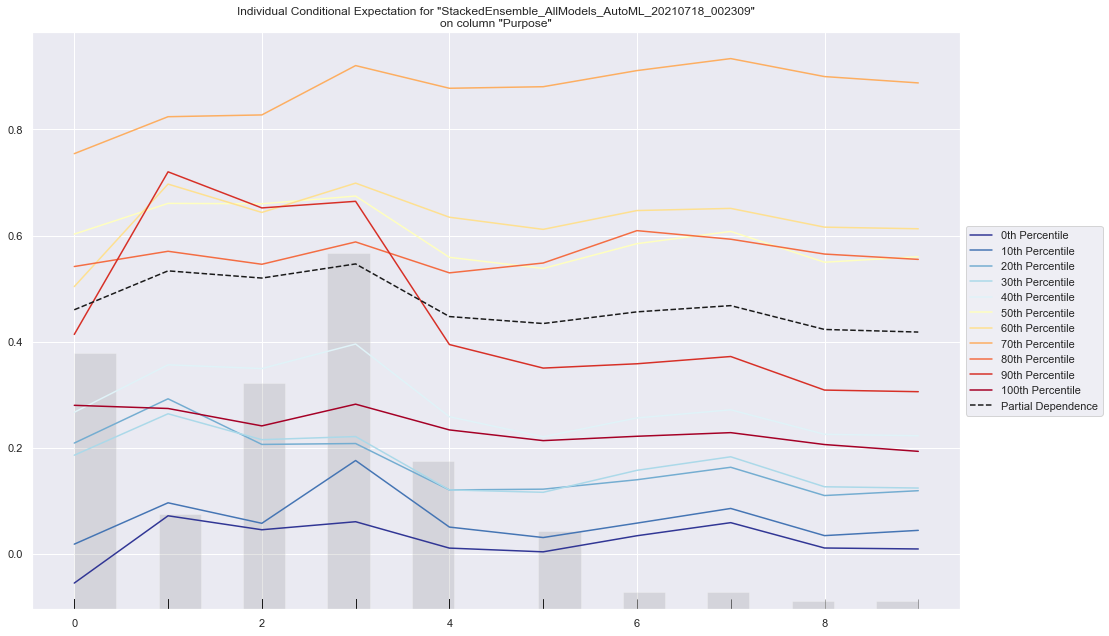

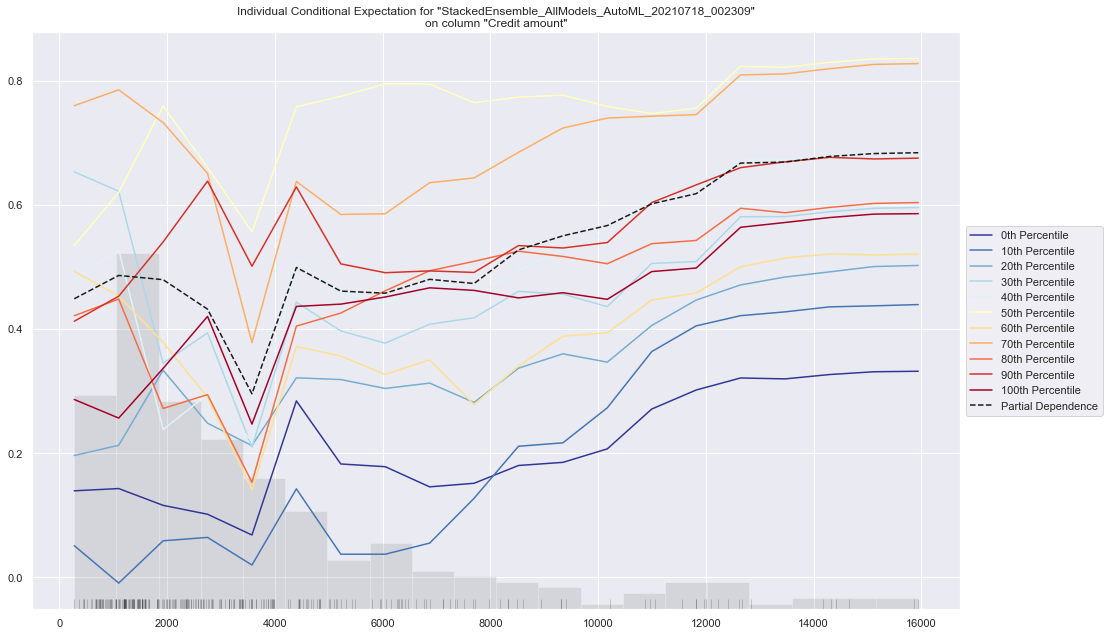

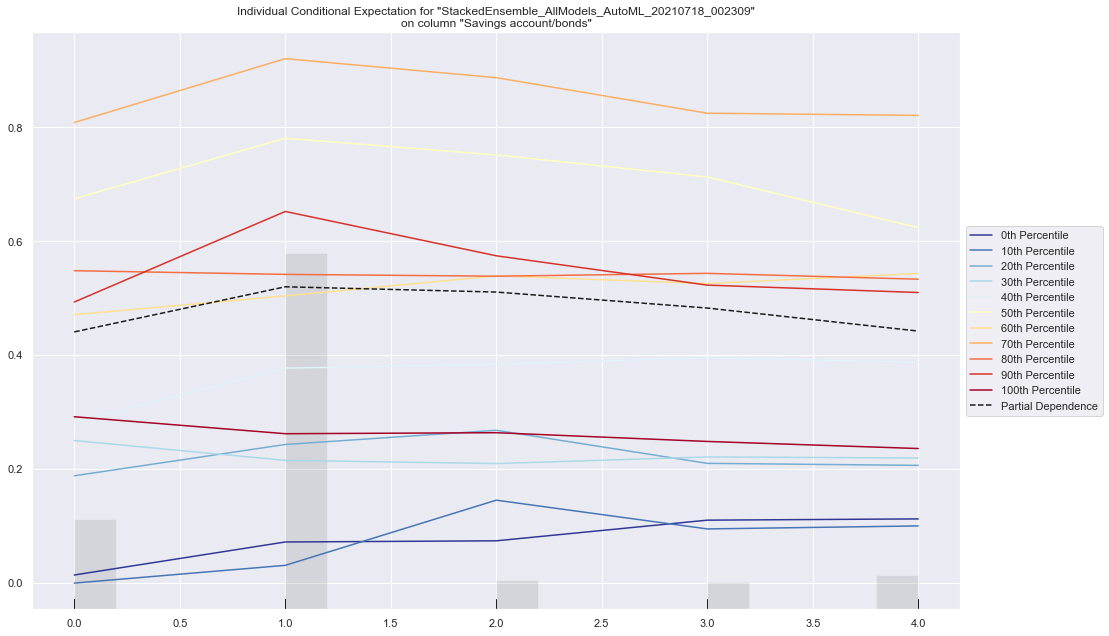

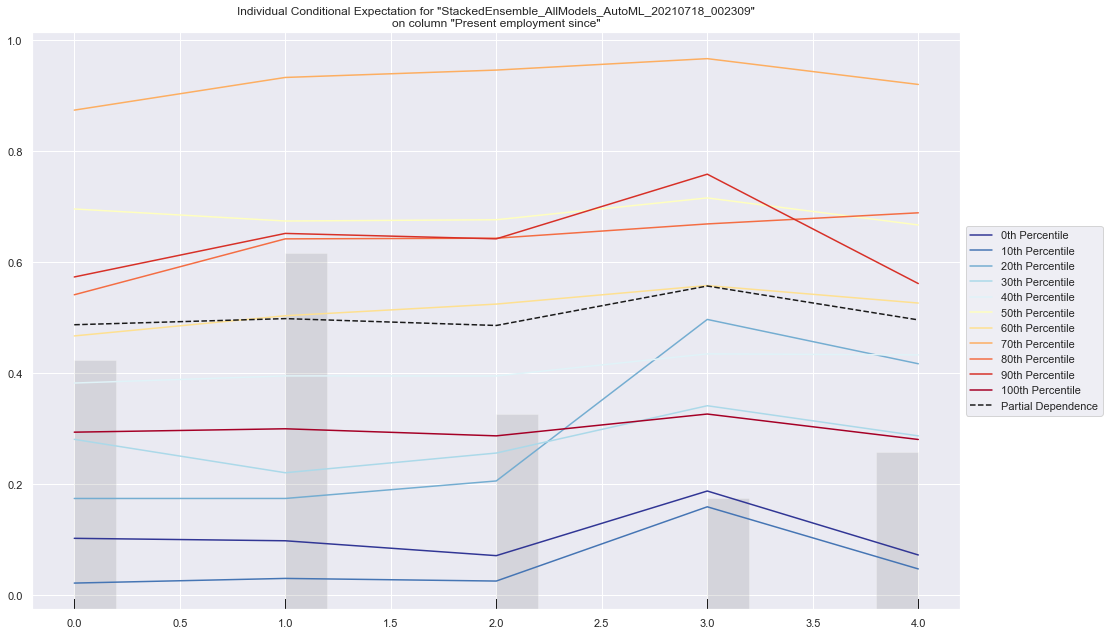

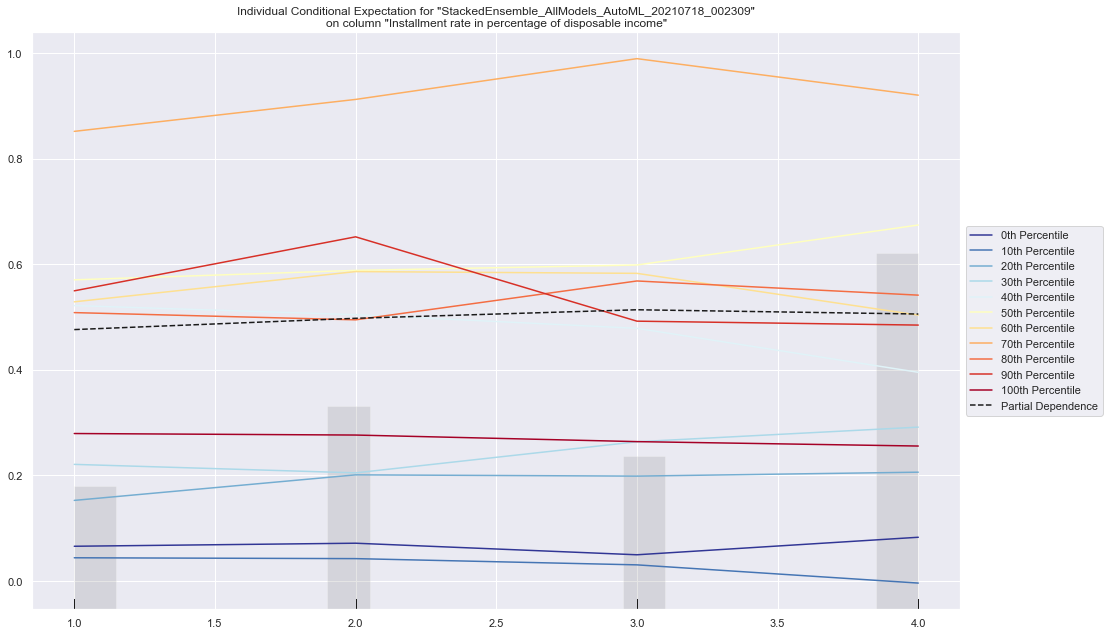

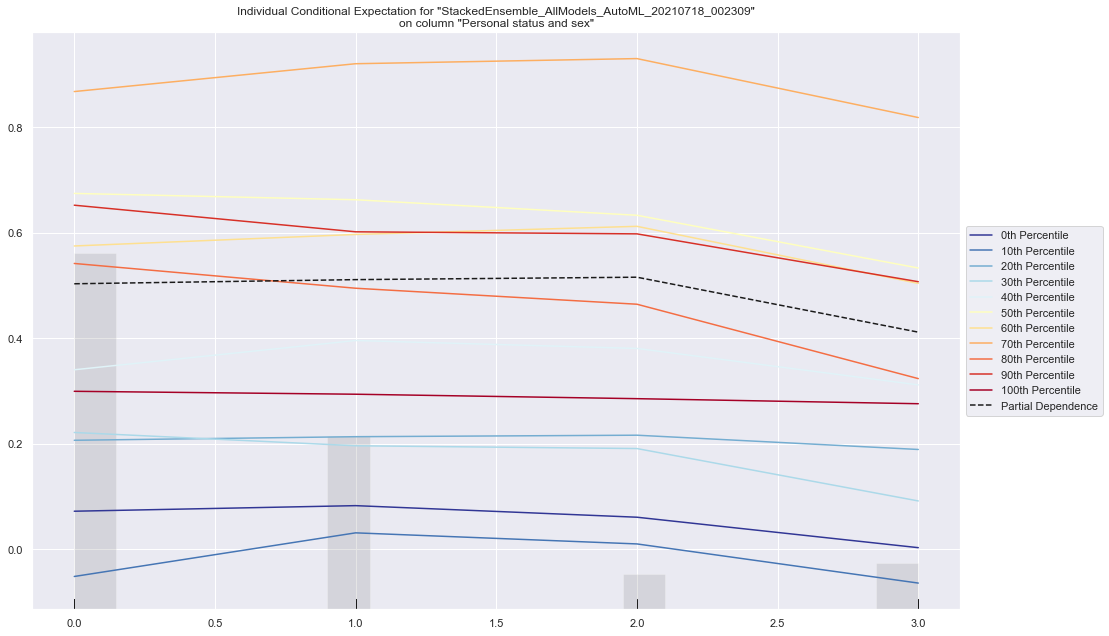

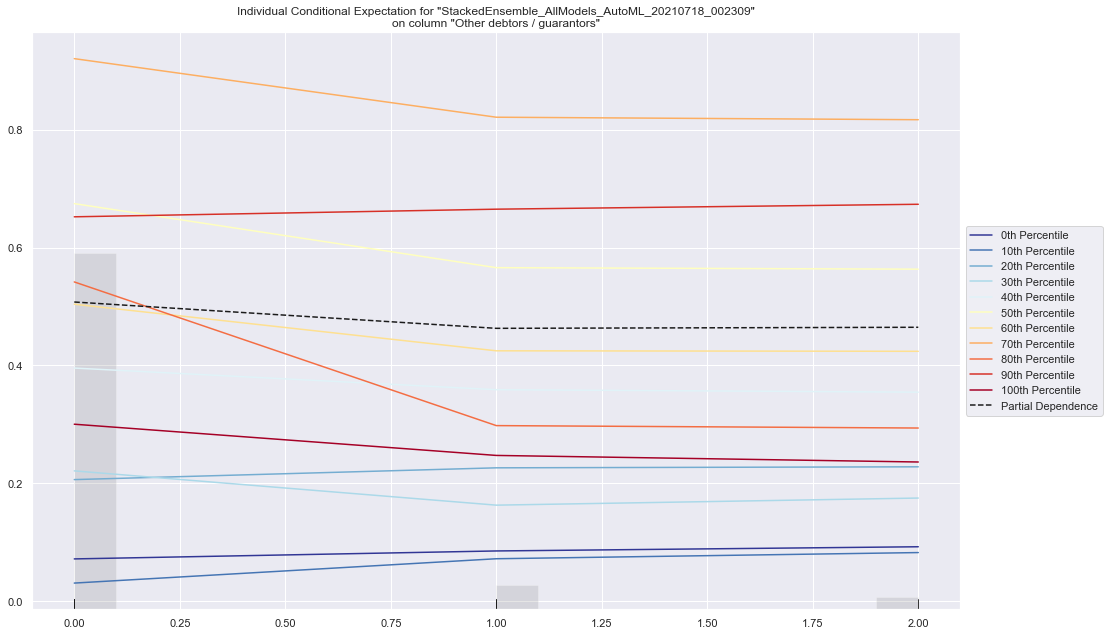

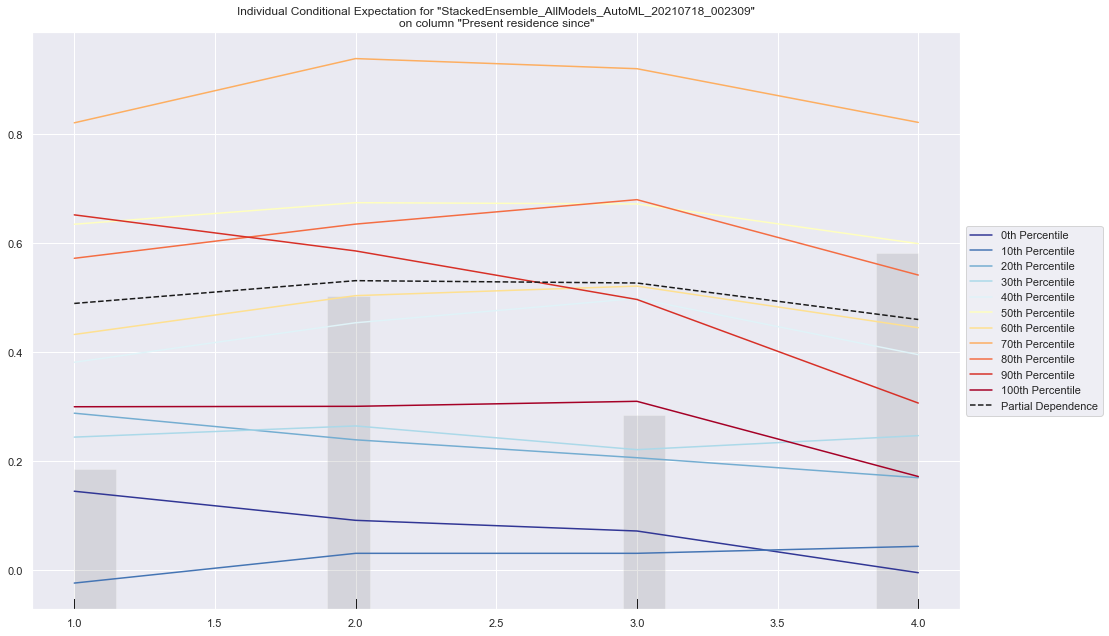

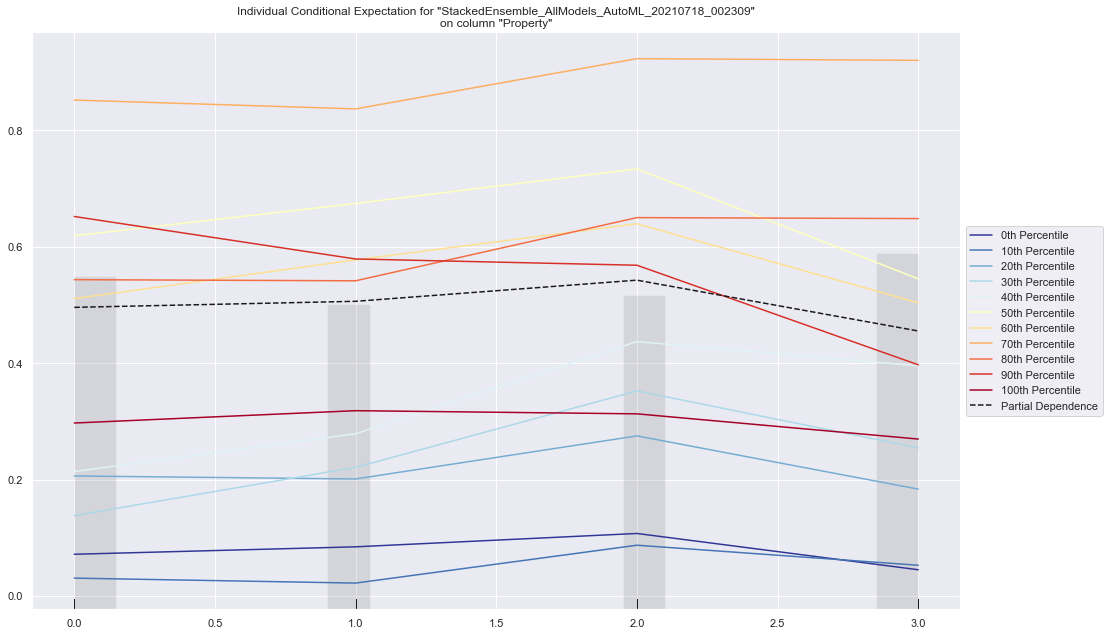

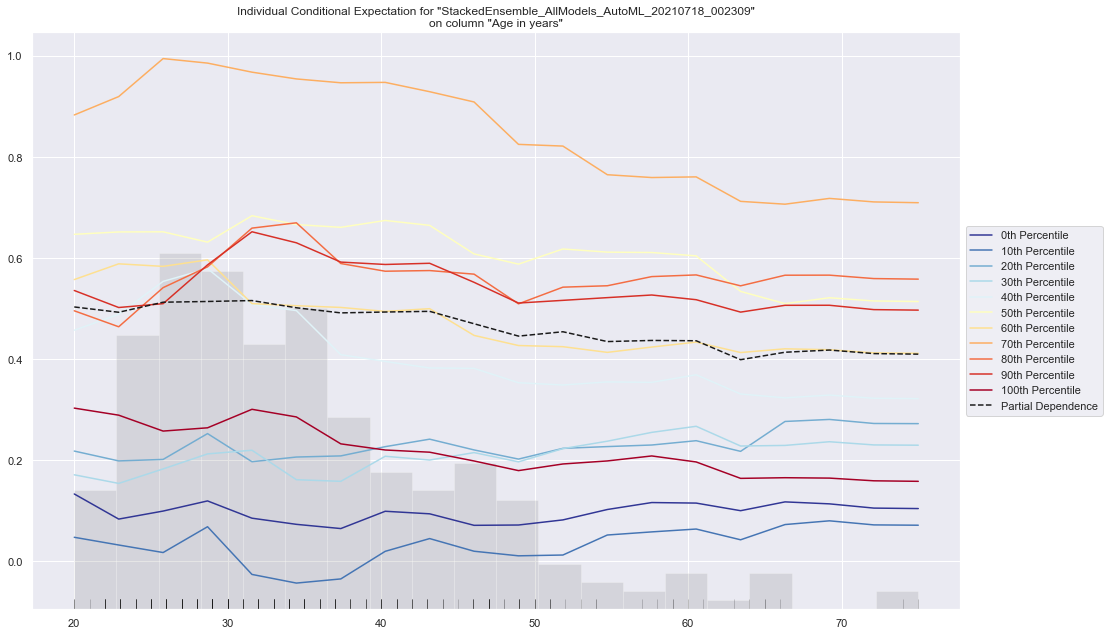

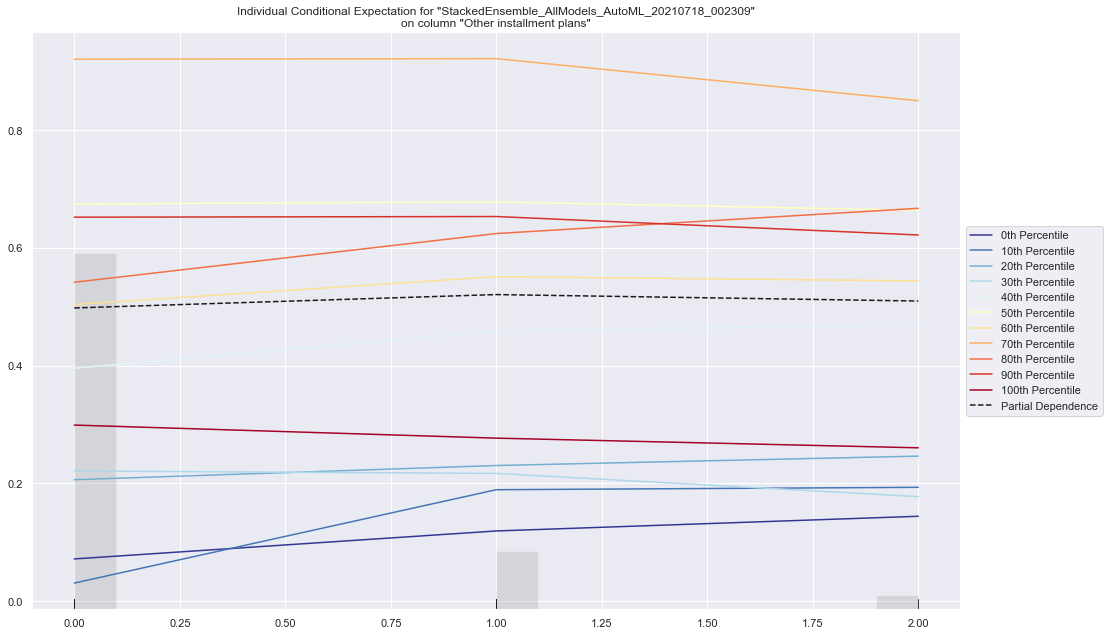

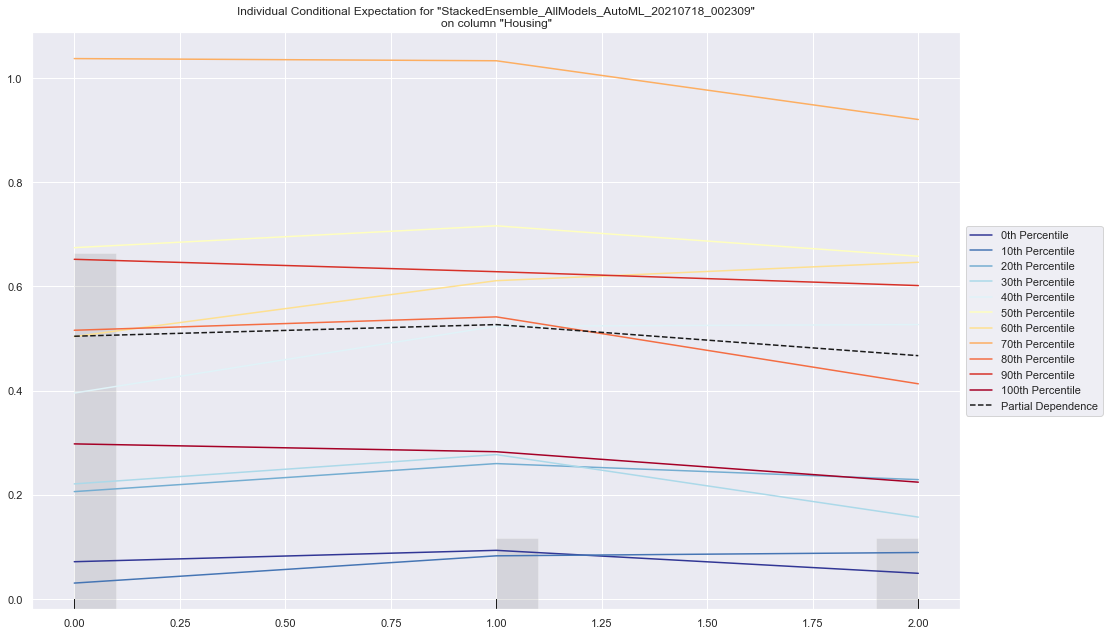

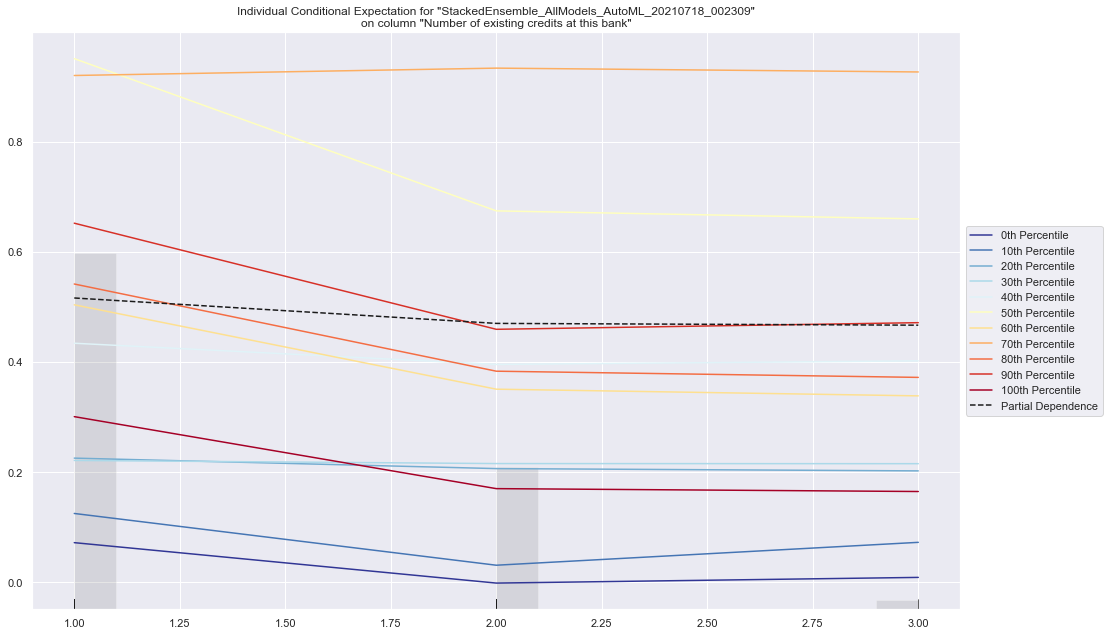

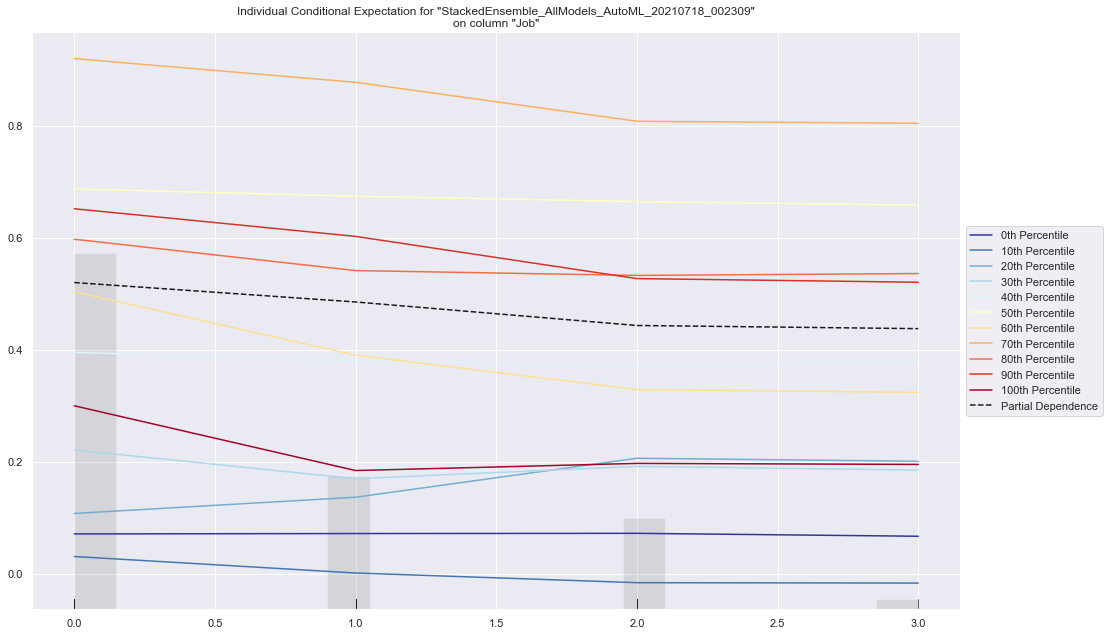

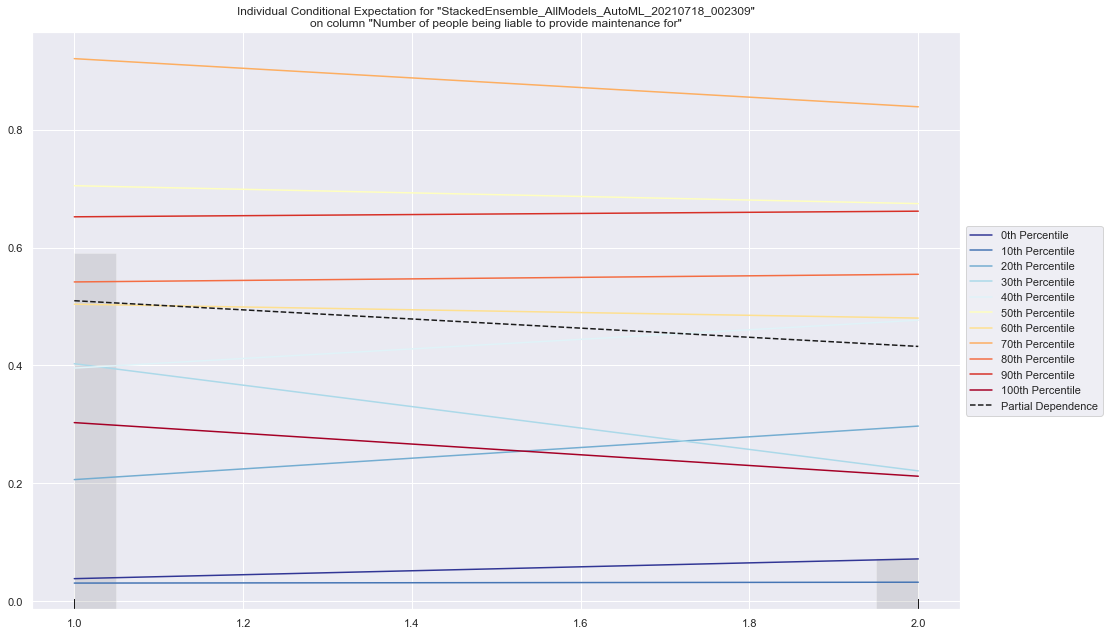

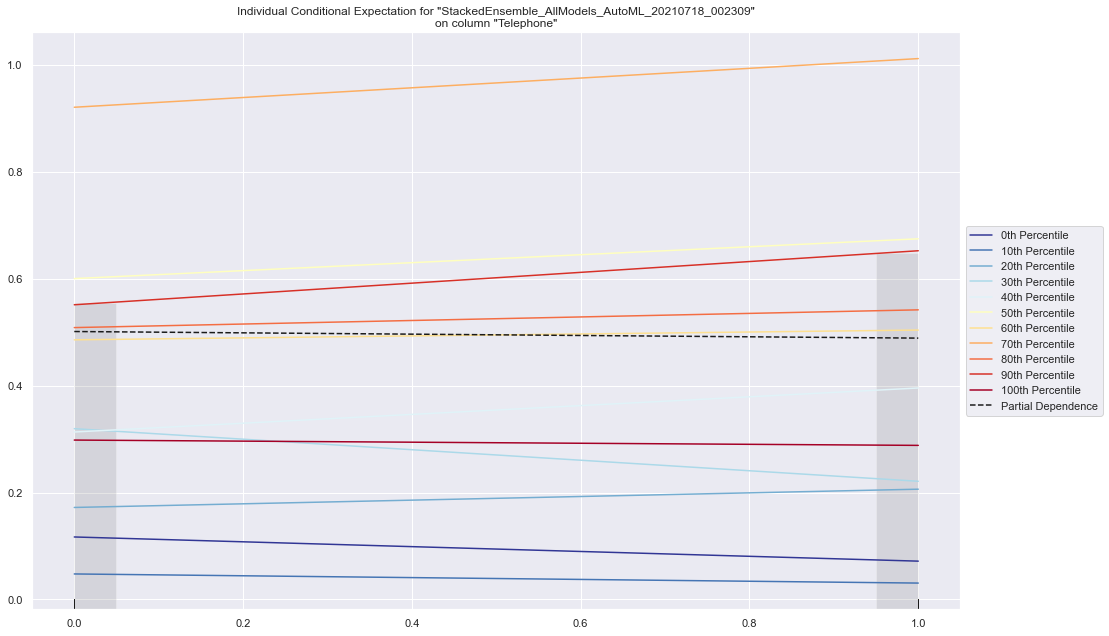

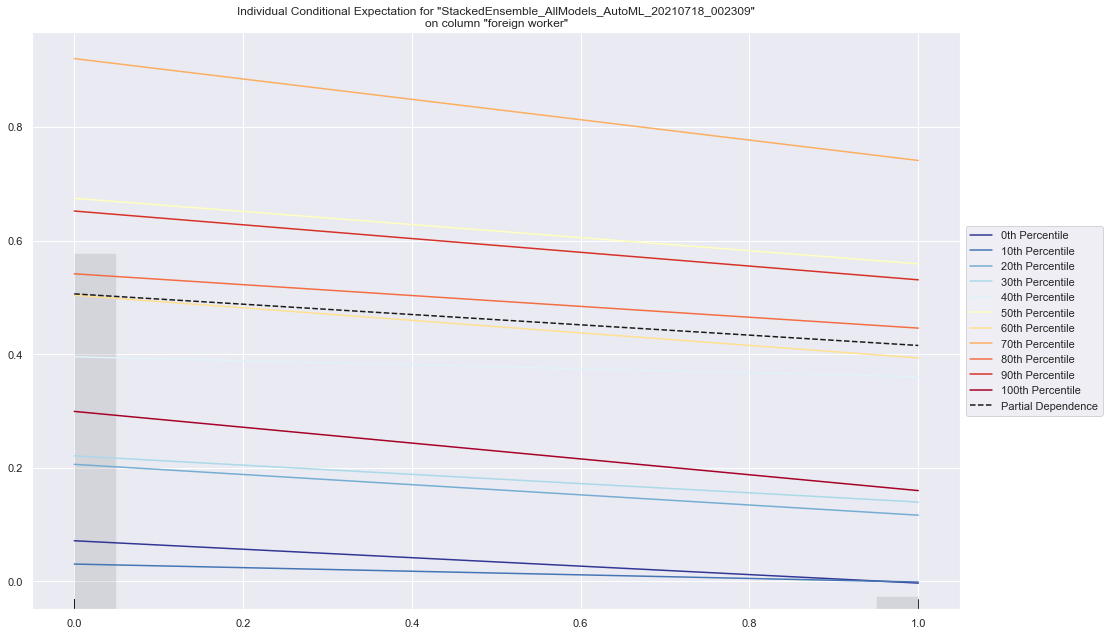

In [62]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()

df_balanced = pd.DataFrame(X_sm)
df_balanced["Cost Matrix(Risk)"] = y_sm

hf = h2o.H2OFrame(df_balanced)

# Response column
y = "Cost Matrix(Risk)"

# Split into train & test
splits = hf.split_frame(ratios = [0.8], seed = 1)
train = splits[0]
test = splits[1]

# Run AutoML for 1 minute
aml = H2OAutoML(max_runtime_secs=60, seed=1)
aml.train(y=y, training_frame=train)

# Explain leader model & compare with all AutoML models
exa = aml.explain(test)

# Explain a single H2O model (e.g. leader model from AutoML)
exm = aml.leader.explain(test)

## Run Server

In [47]:
from joblib import dump, load
import copy
import pandas as pd


class CreditScoreModel:
    def __init__(self):
        self.model = load("./models/credit_risk.model")

    classes = ("Good Risk", "Bad Risk")

    def numerate_data(self, query_data):
        x = [query_data]
        data = {k:[] for k in self.column_data.keys()}
        for obj in x:
            for key,value in obj.items():
                if not obj[key].isdigit():
                    data[self.key_map[key]].append(self.column_data[self.key_map[key]].index(value))
                else:
                    data[self.key_map[key]].append(int(value))
        return pd.DataFrame(data)

    
    def predict(self, query_data):
        x = self.numerate_data(query_data)
        prediction = self.model.predict(x)[0]
        return self.classes[prediction]

    column_data = {
        "Status of existing checking account": [
            "<0 DM",
            "0 <= <200 DM",
            "no checking account",
            ">= 200 DM "
        ],
        "Credit history": [
            "critical account",
            "existing credits paid back duly till now",
            "delay in paying off",
            "no credits taken",
            "all credits at this bank paid back duly"
        ],
        "Purpose": [
            "radio/television",
            "education",
            "furniture/equipment",
            "car (new)",
            "car (used)",
            "business",
            "domestic appliances",
            "repairs",
            "others",
            "retraining"
        ],
        "Savings account/bonds": [
            "no savings account",
            "<100 DM",
            "500 <= < 1000 DM",
            ">= 1000 DM",
            "100 <= <500 DM"
        ],
        "Present employment since": [
            ">=7 years",
            "1<= < 4 years",
            "4<= <7 years",
            "unemployed",
            "<1 years"
        ],
        "Personal status and sex": [
            "male:single",
            "female:divorced/separated/married",
            "male:divorced/separated",
            "male:married/widowed"
        ],
        "Other debtors / guarantors": [
            "none",
            "guarantor",
            "co-applicant"
        ],
        "Property": [
            "real estate",
            "savings agreement/life insurance",
            "unknown / no property",
            "car or other"
        ],
        "Other installment plans": [
            "none",
            "bank",
            "store"
        ],
        "Housing": [
            "own",
            "for free",
            "rent"
        ],
        "Job": [
            "skilled employee / official",
            "unskilled - resident",
            "management/ highly qualified employee",
            "unemployed/ unskilled  - non-resident"
        ],
        "Telephone": [
            "yes",
            "none"
        ],
        "foreign worker": [
            "yes",
            "no"
        ],
        "Duration in month": [],
        "Credit amount": [],
        "Installment rate in percentage of disposable income": [],
        "Present residence since": [],
        "Age in years": [],
        "Number of existing credits at this bank": [],
        "Number of people being liable to provide maintenance for": [],
    }

    key_map = {
        "Status_of_existing_checking_account": "Status of existing checking account",
        "Credit_history": "Credit history",
        "Purpose": "Purpose",
        "Savings_account_bonds": "Savings account/bonds",
        "Present_employment_since": "Present employment since",
        "Personal_status_and_sex": "Personal status and sex",
        "Other_debtors_guarantors": "Other debtors / guarantors",
        "Property": "Property",
        "Other_installment_plans": "Other installment plans",
        "Housing": "Housing",
        "Job": "Job",
        "Telephone": "Telephone",
        "foreign_worker": "foreign worker",
        "Duration_in_month": "Duration in month",
        "Credit_amount": "Credit amount",
        "Installment_rate_in_percentage_of_disposable_income": "Installment rate in percentage of disposable income",
        "Present_residence_since": "Present residence since",
        "Age_in_years": "Age in years",
        "Number_of_existing_credits_at_this_bank": "Number of existing credits at this bank",
        "Number_of_people_being_liable_to_provide_maintenance_for": "Number of people being liable to provide maintenance for",
    }
